In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('precision', 3)

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')
import sklearn

# Statistics
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

print(' Libraries Imported!')

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Requirement already up-to-date: seaborn in c:\users\sarah\anaconda3\lib\site-packages (0.12.2)


ModuleNotFoundError: No module named 'scikitplot'

In [2]:
#conda install -c conda-forge scikit-plot

In [2]:
df = pd.read_csv("C:/BI/CIND 820/Files/Churn_Modelling.csv", encoding = 'utf-8')


print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))


It contains 10000 rows and 14 columns.


In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
#!pip install pandas-profiling
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [5]:
from pandas_profiling import ProfileReport
ProfileReport(df) #to display the report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe().T

count        mean        std     min       25%         50%  \
CreditScore      10000.0     650.529     96.653  350.00    584.00     652.000   
Age              10000.0      38.922     10.488   18.00     32.00      37.000   
Tenure           10000.0       5.013      2.892    0.00      3.00       5.000   
Balance          10000.0   76485.889  62397.405    0.00      0.00   97198.540   
NumOfProducts    10000.0       1.530      0.582    1.00      1.00       1.000   
HasCrCard        10000.0       0.706      0.456    0.00      0.00       1.000   
IsActiveMember   10000.0       0.515      0.500    0.00      0.00       1.000   
EstimatedSalary  10000.0  100090.240  57510.493   11.58  51002.11  100193.915   
Exited           10000.0       0.204      0.403    0.00      0.00       0.000   

                        75%        max  
CreditScore         718.000     850.00  
Age                  44.000      92.00  
Tenure                7.000      10.00  
Balance          127644.240  250898.09  
NumOfProducts         2.000       4.00  
HasCrCard             1.000       1.00  
IsActiveMember        1.000       1.00  
EstimatedSalary  149388.247  199992.48  
Exited                0.000       1.00

In [8]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = df.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df1, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df1,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])

    plt.tight_layout();



In [9]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Exited',
                  data=df,
                  palette=colors,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Exited',
                data=df,
                palette=colors_cat,
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])

    plt.tight_layout();



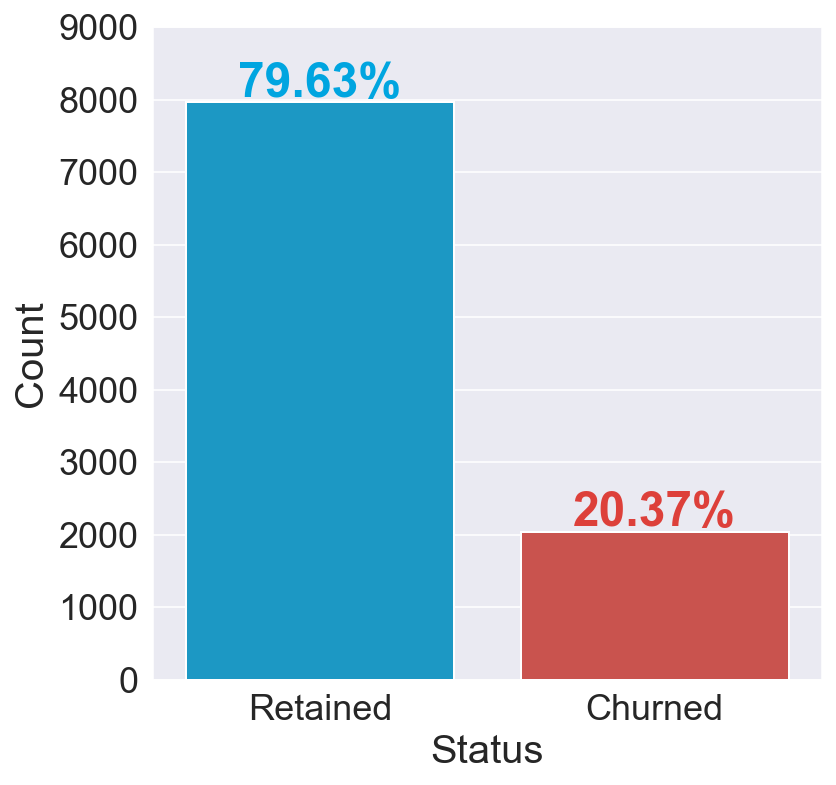

In [28]:
#Exploratory Data Analysis


colors = ['#00A5E0', '#DD403A']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}

font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2


fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Exited', data=df, palette=colors, ax=ax)

for index, value in enumerate(df['Exited'].value_counts()):
    label = '{}%'.format(round((value / df['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size + 4)

ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 9000]);

In [10]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


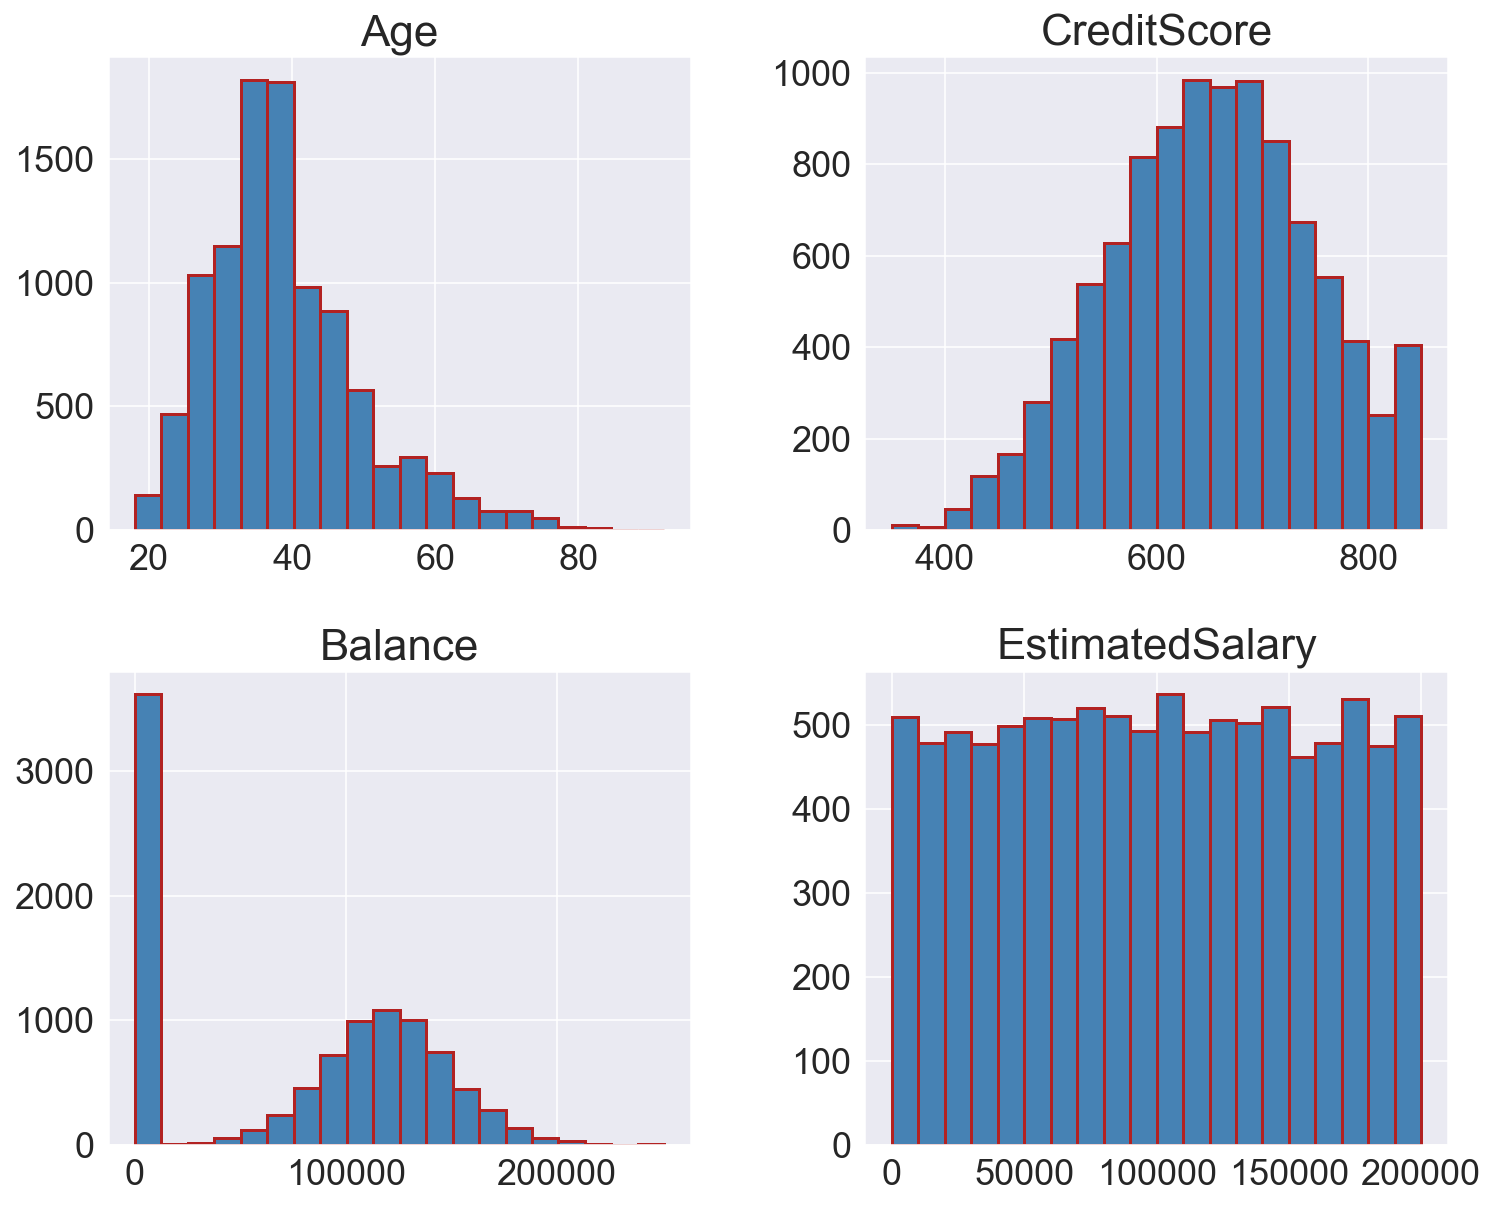

In [30]:
df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

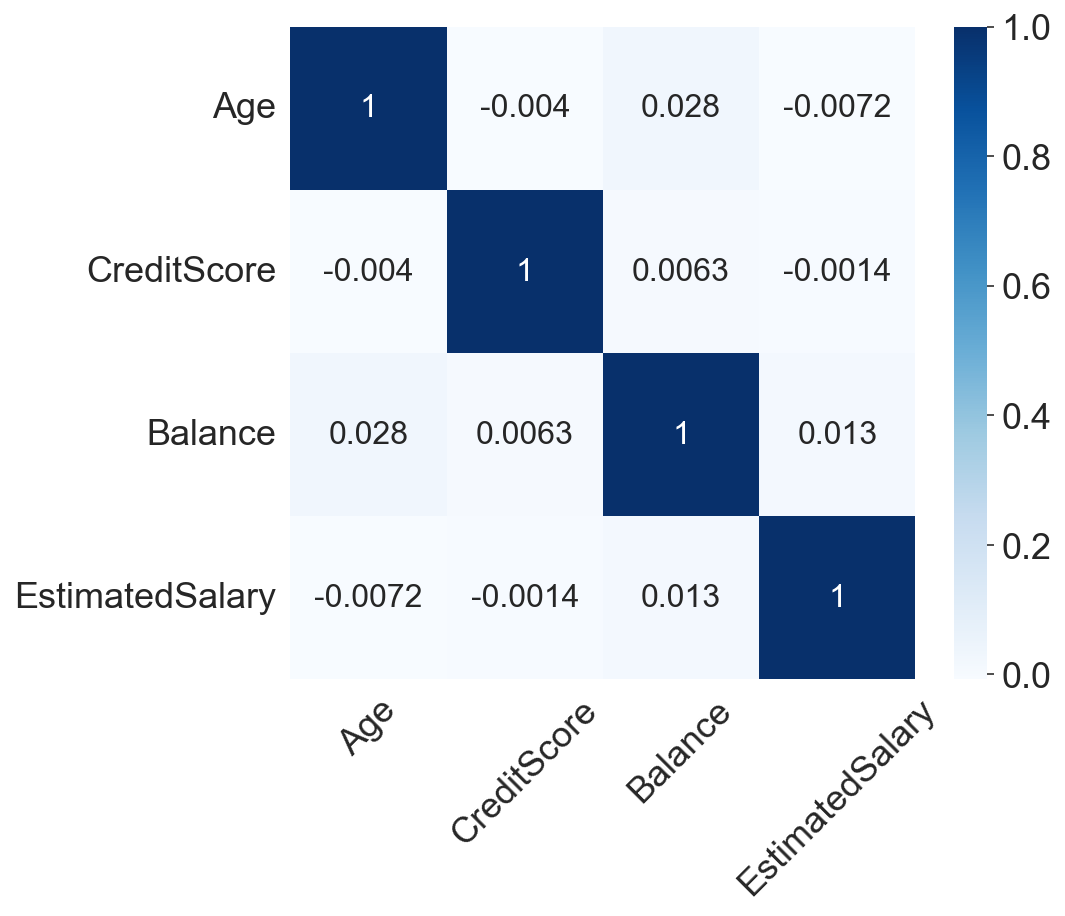

In [31]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);


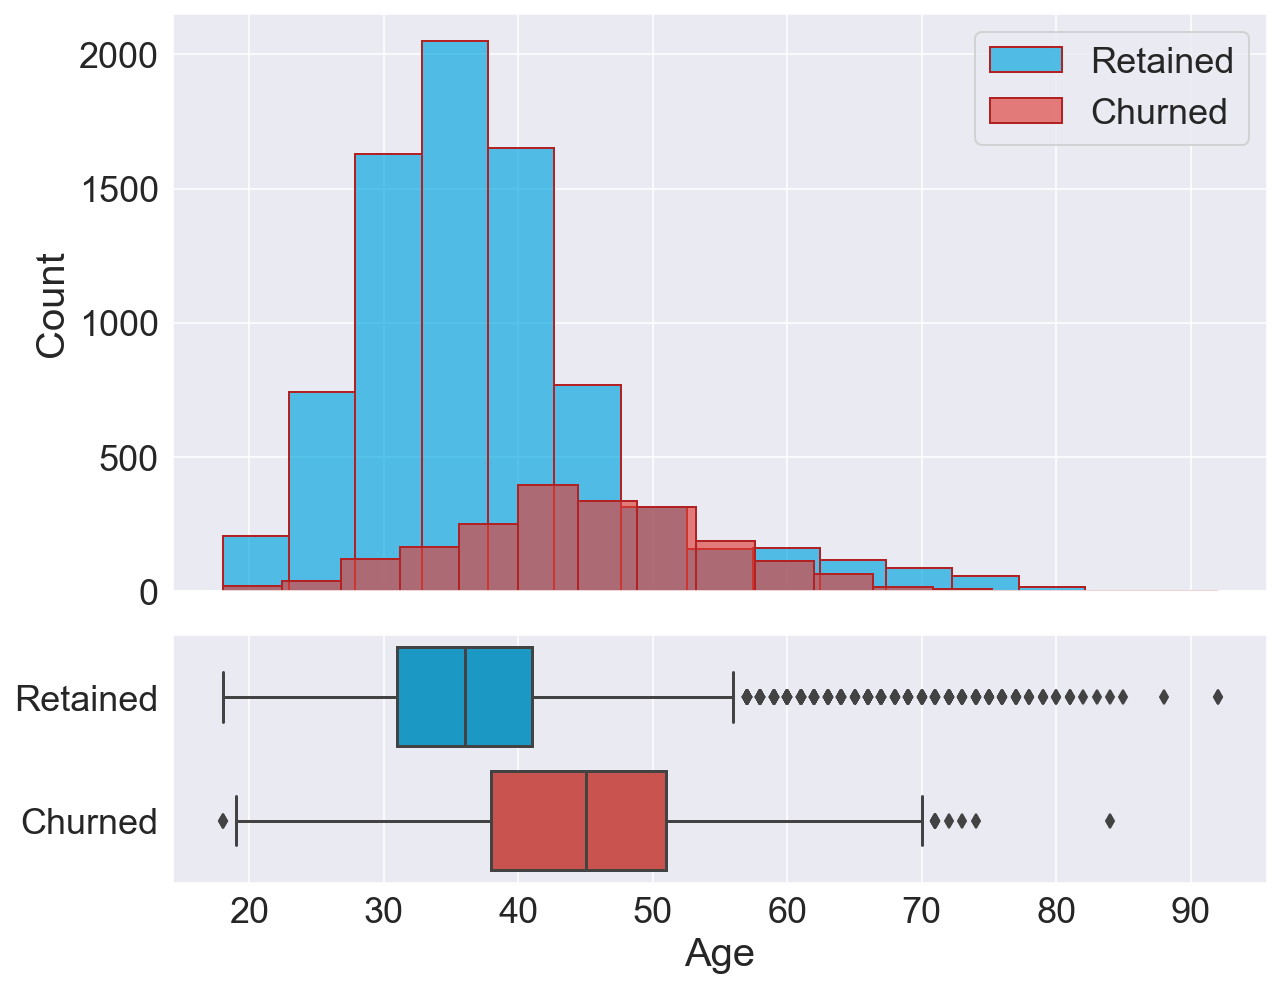

In [37]:
df_churned = df[df['Exited'] == 1]
df_retained = df[df['Exited'] == 0]

plot_continuous('Age')


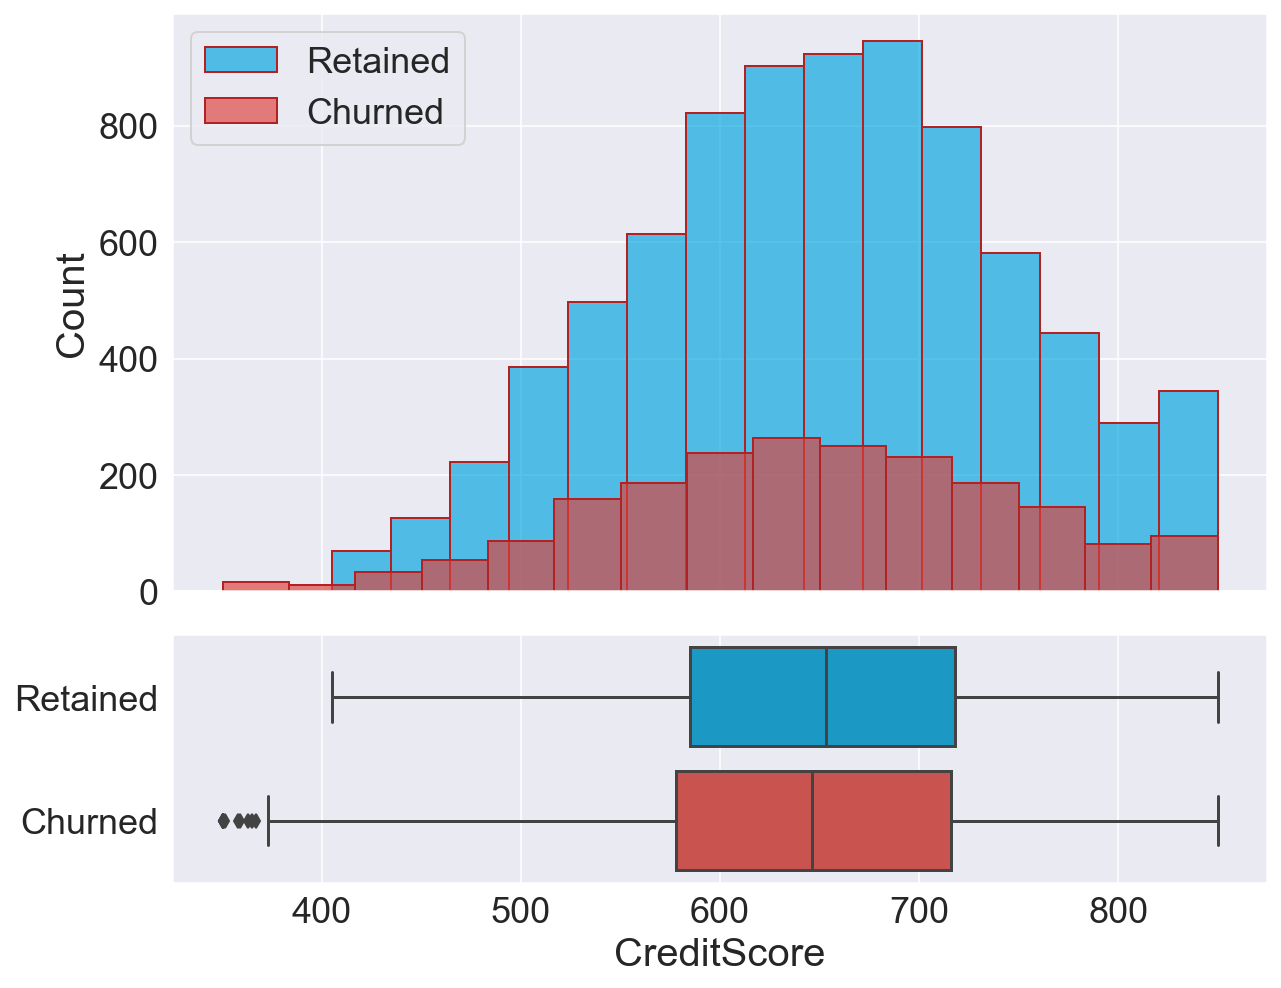

In [38]:
plot_continuous('CreditScore')

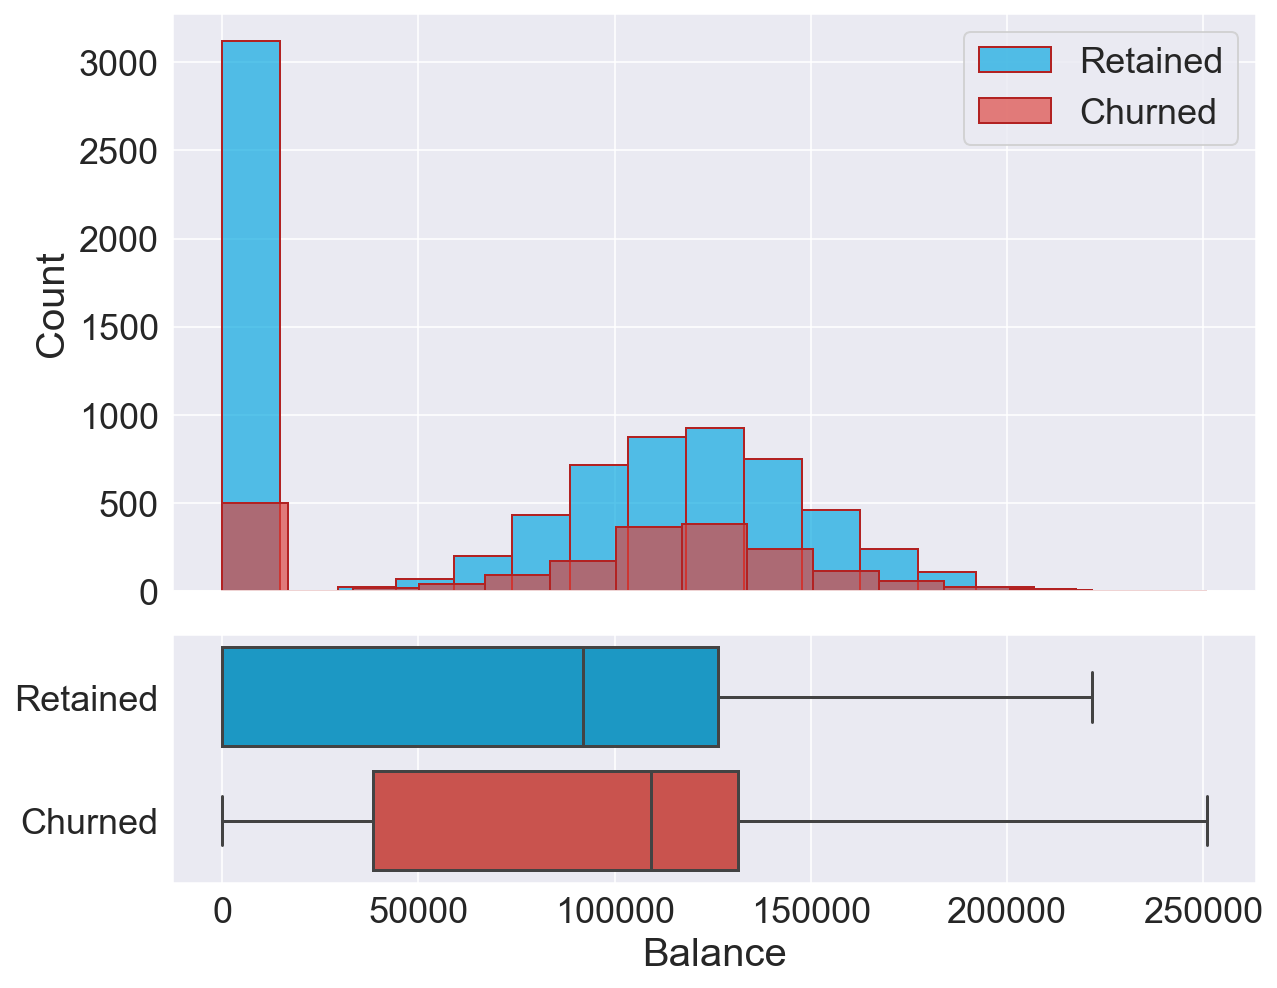

In [39]:
plot_continuous('Balance')

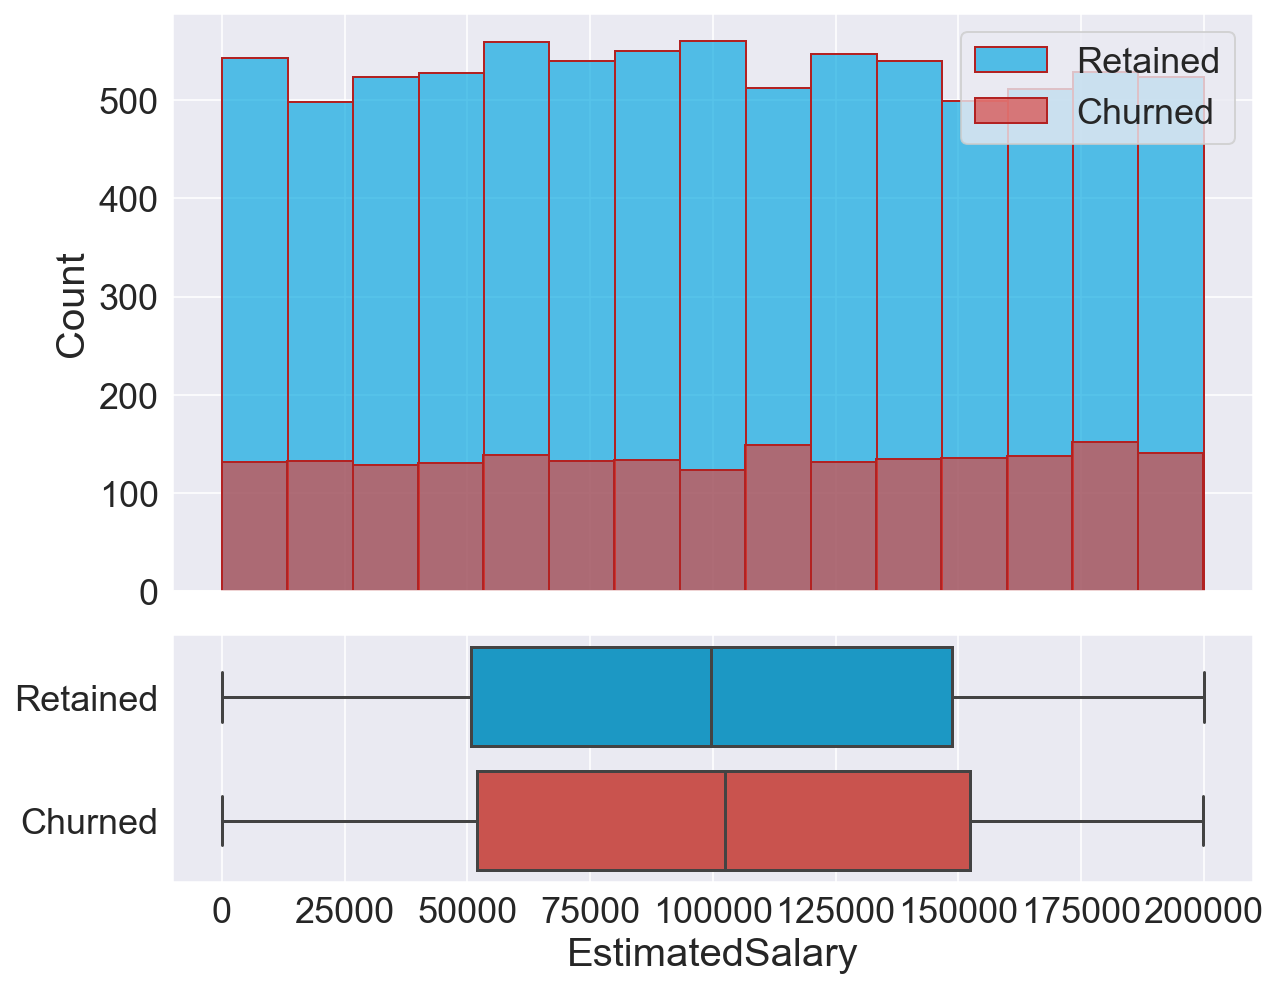

In [40]:
plot_continuous('EstimatedSalary')

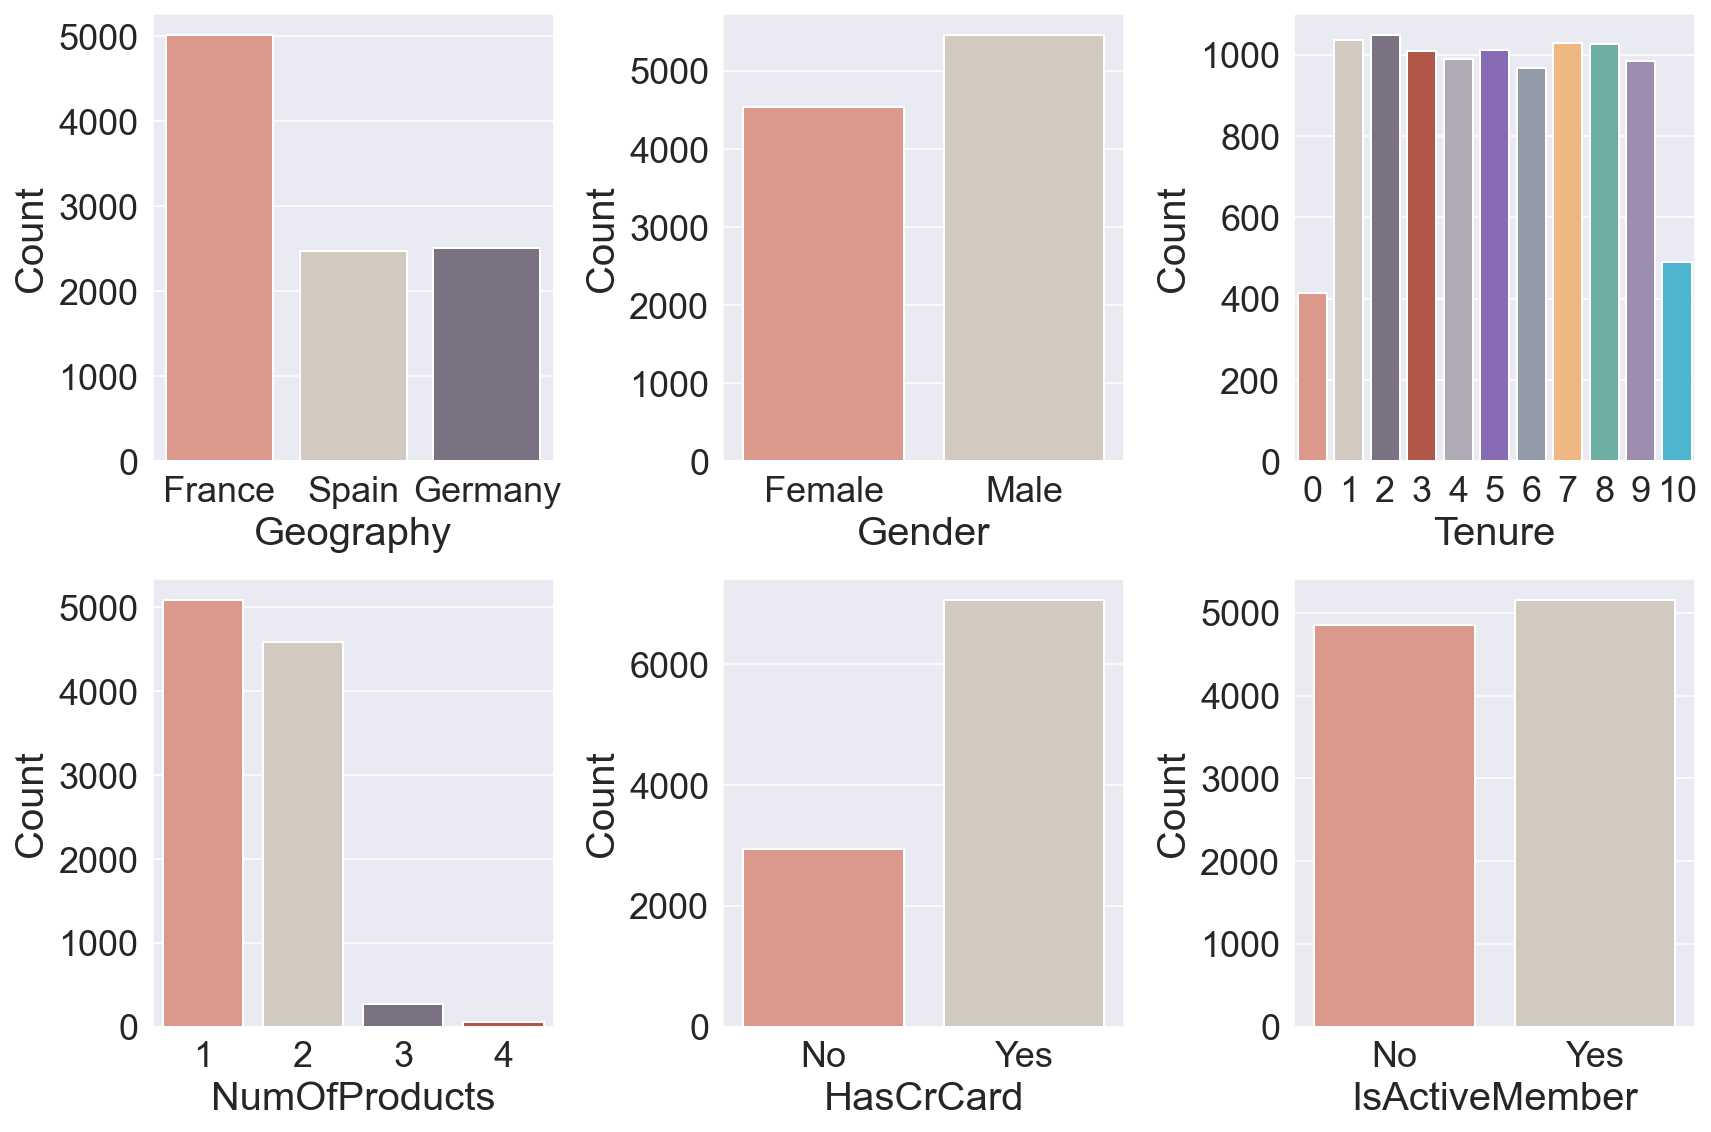

In [41]:
df_cat = df[categorical]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=df, palette=colors_cat)

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

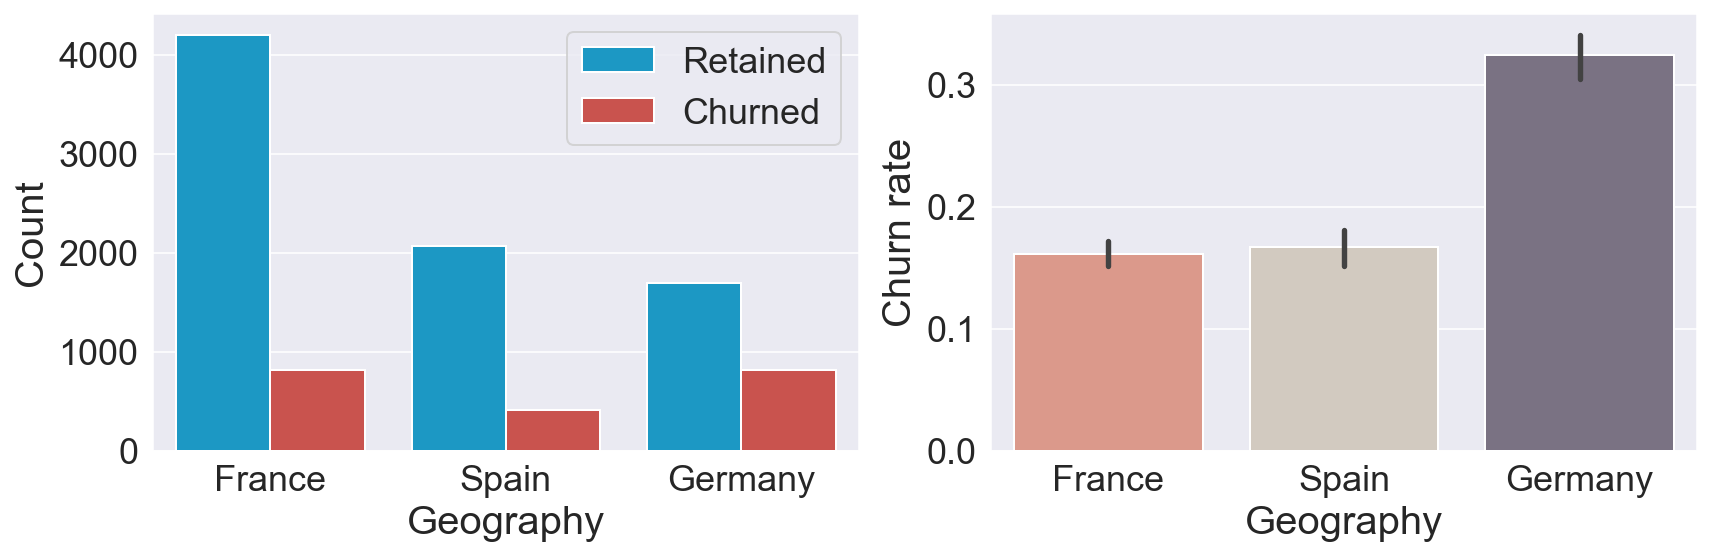

In [42]:
plot_categorical('Geography')

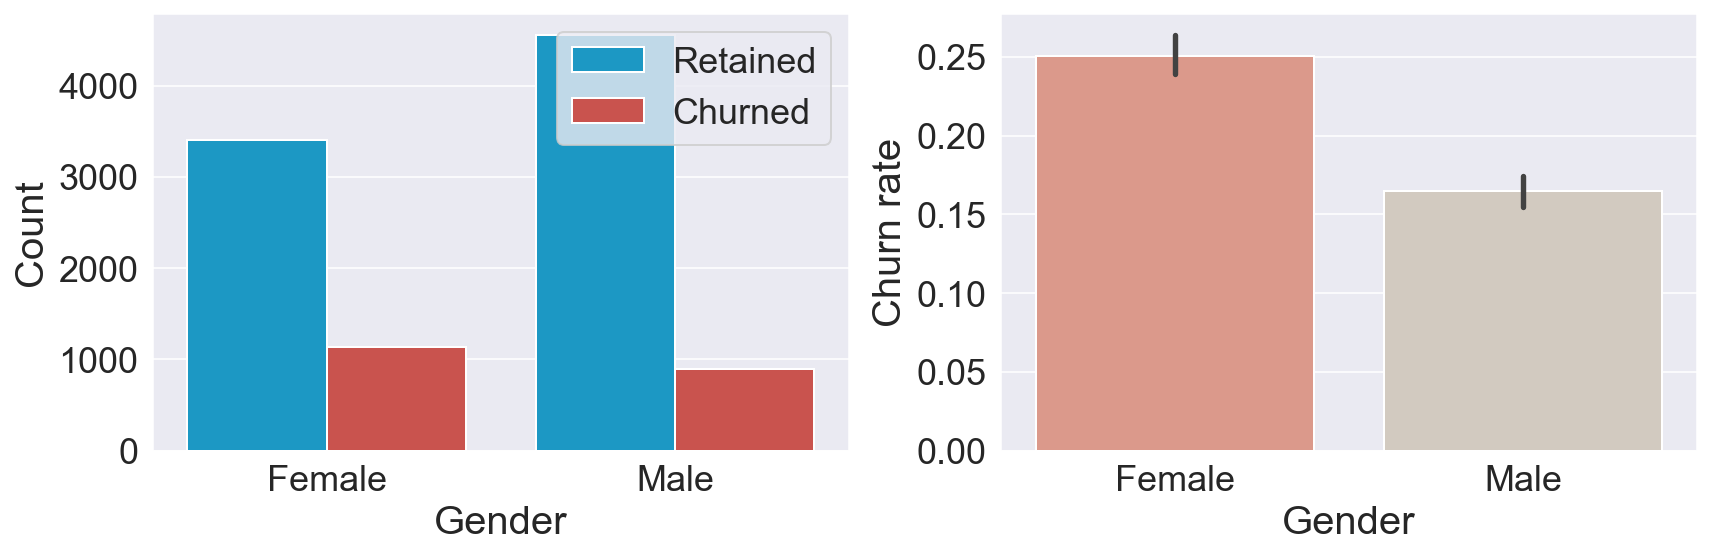

In [43]:
plot_categorical('Gender')

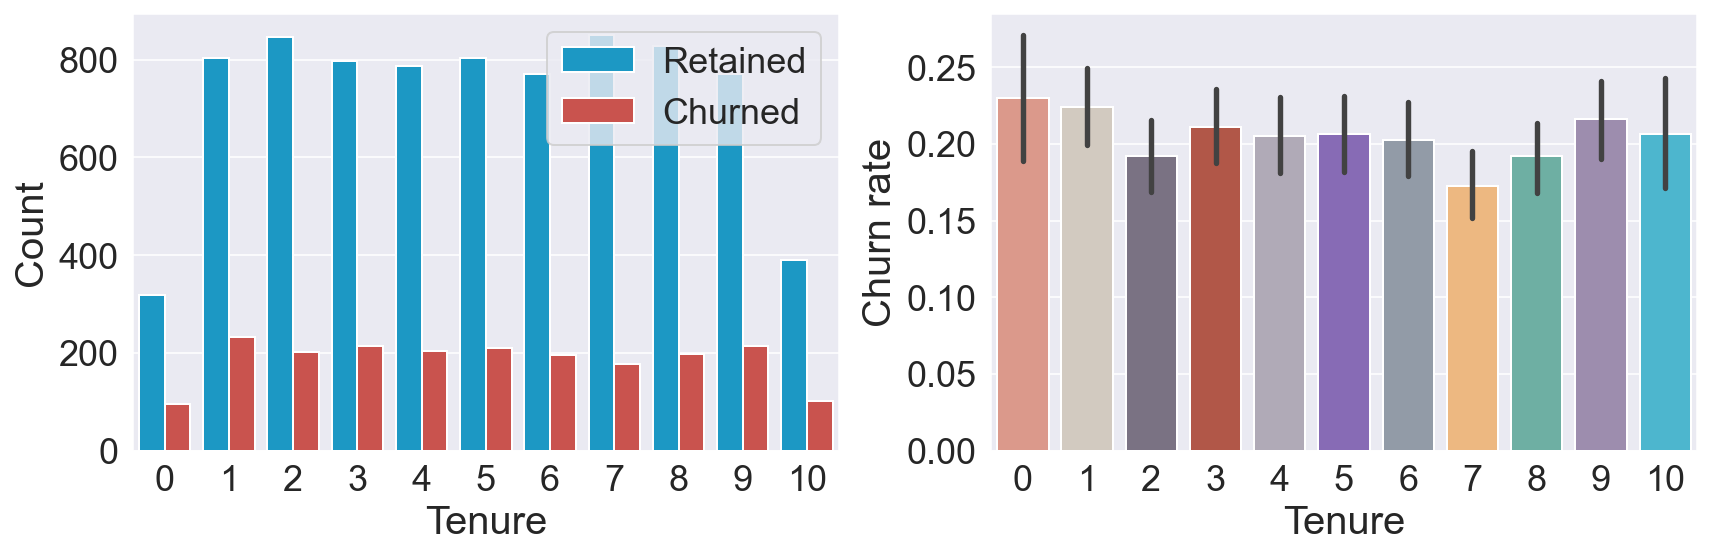

In [44]:
plot_categorical('Tenure')

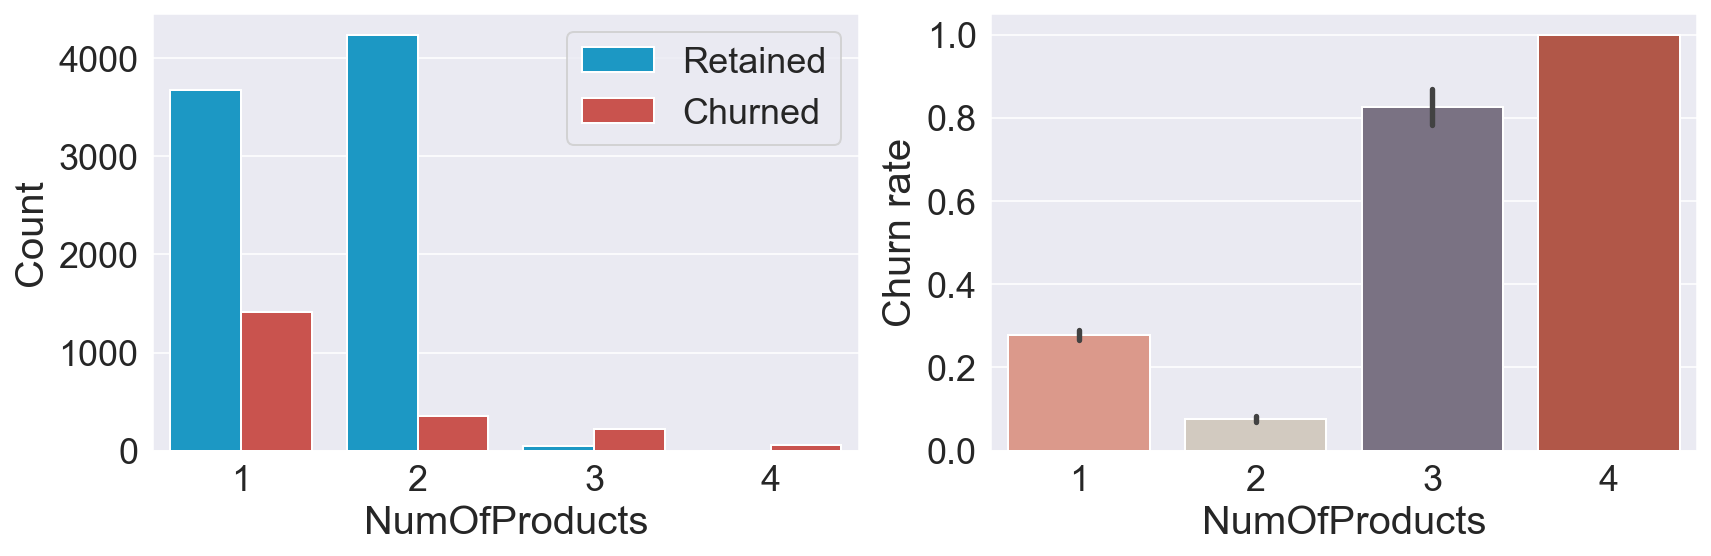

In [45]:
plot_categorical('NumOfProducts')

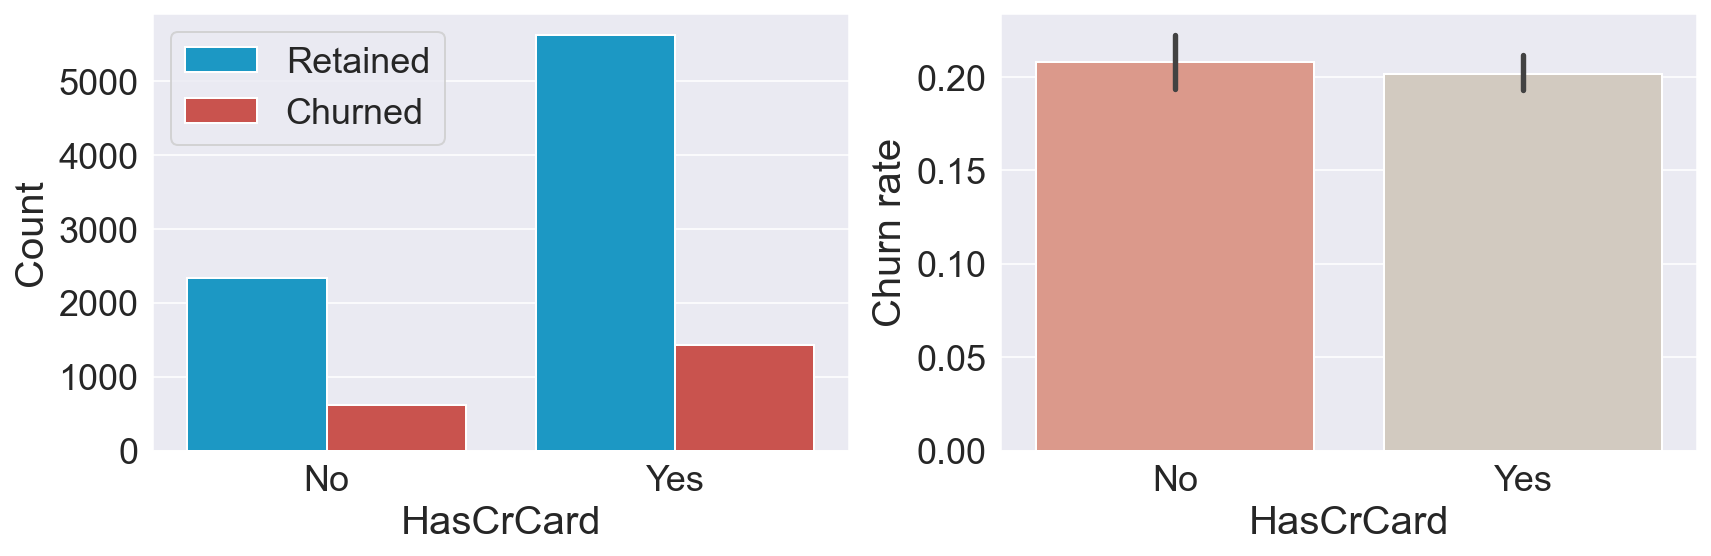

In [46]:
plot_categorical('HasCrCard')

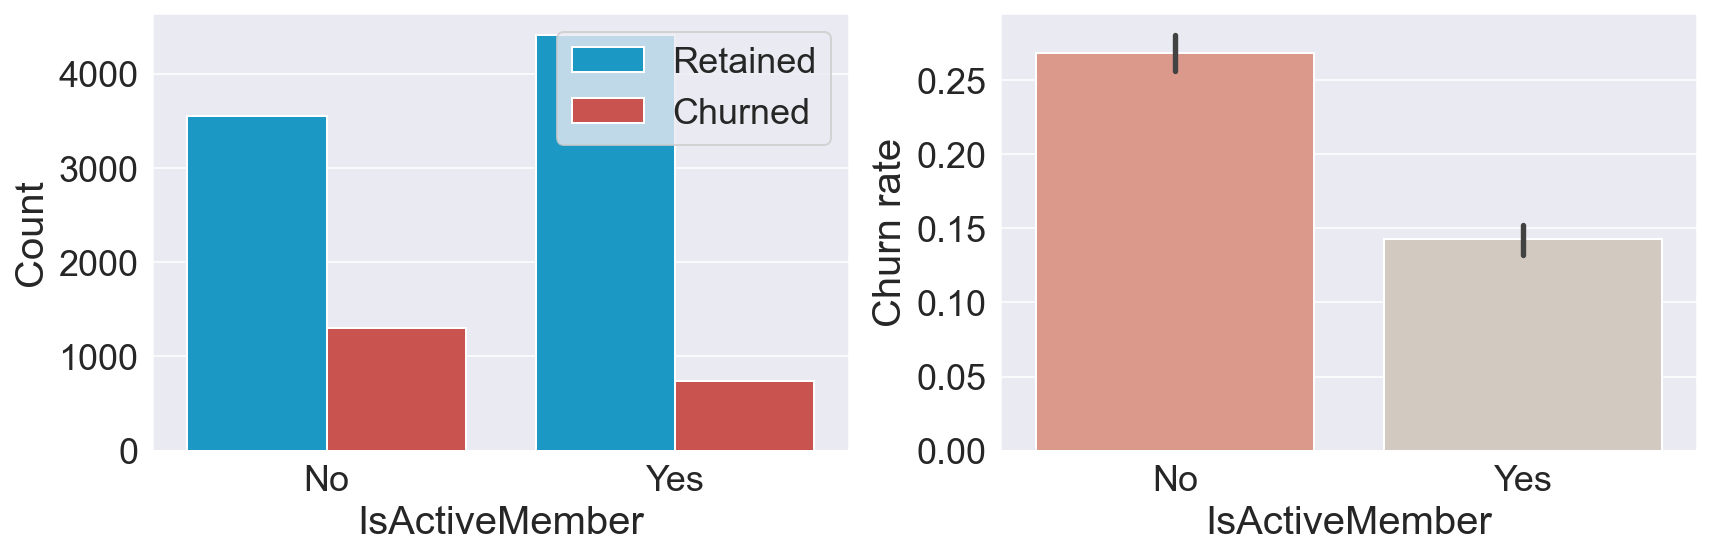

In [47]:
plot_categorical('IsActiveMember')

In [48]:
#features_drop = ['Tenure', 'HasCrCard', 'EstimatedSalary']
#train_df = train_df.drop(features_drop, axis=1)

#print('✔️ Features Dropped!')

In [11]:
 #encoding our categorical attributes

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df['Geography'] = df['Geography'].map({
    'Germany': 1,
    'Spain': 2,
    'France': 3
})

print(' Features Encoded!')

 Features Encoded!


In [12]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          3       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          3       0   42       8  159660.80              3   
3          699          3       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [13]:
scaler = StandardScaler()

scl_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure']
df[scl_columns] = scaler.fit_transform(df[scl_columns])

print(' Features Scaled!')
df.head()

 Features Scaled!


CreditScore  Geography  Gender    Age  Tenure  Balance  NumOfProducts  \
0       -0.326          3       0  0.294  -1.042   -1.226              1   
1       -0.440          2       0  0.198  -1.388    0.117              1   
2       -1.537          3       0  0.294   1.033    1.333              3   
3        0.502          3       0  0.007  -1.388   -1.226              2   
4        2.064          2       0  0.389  -1.042    0.786              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1            0.022       1  
1          0               1            0.217       0  
2          1               0            0.241       1  
3          0               0           -0.109       0  
4          1               1           -0.365       0

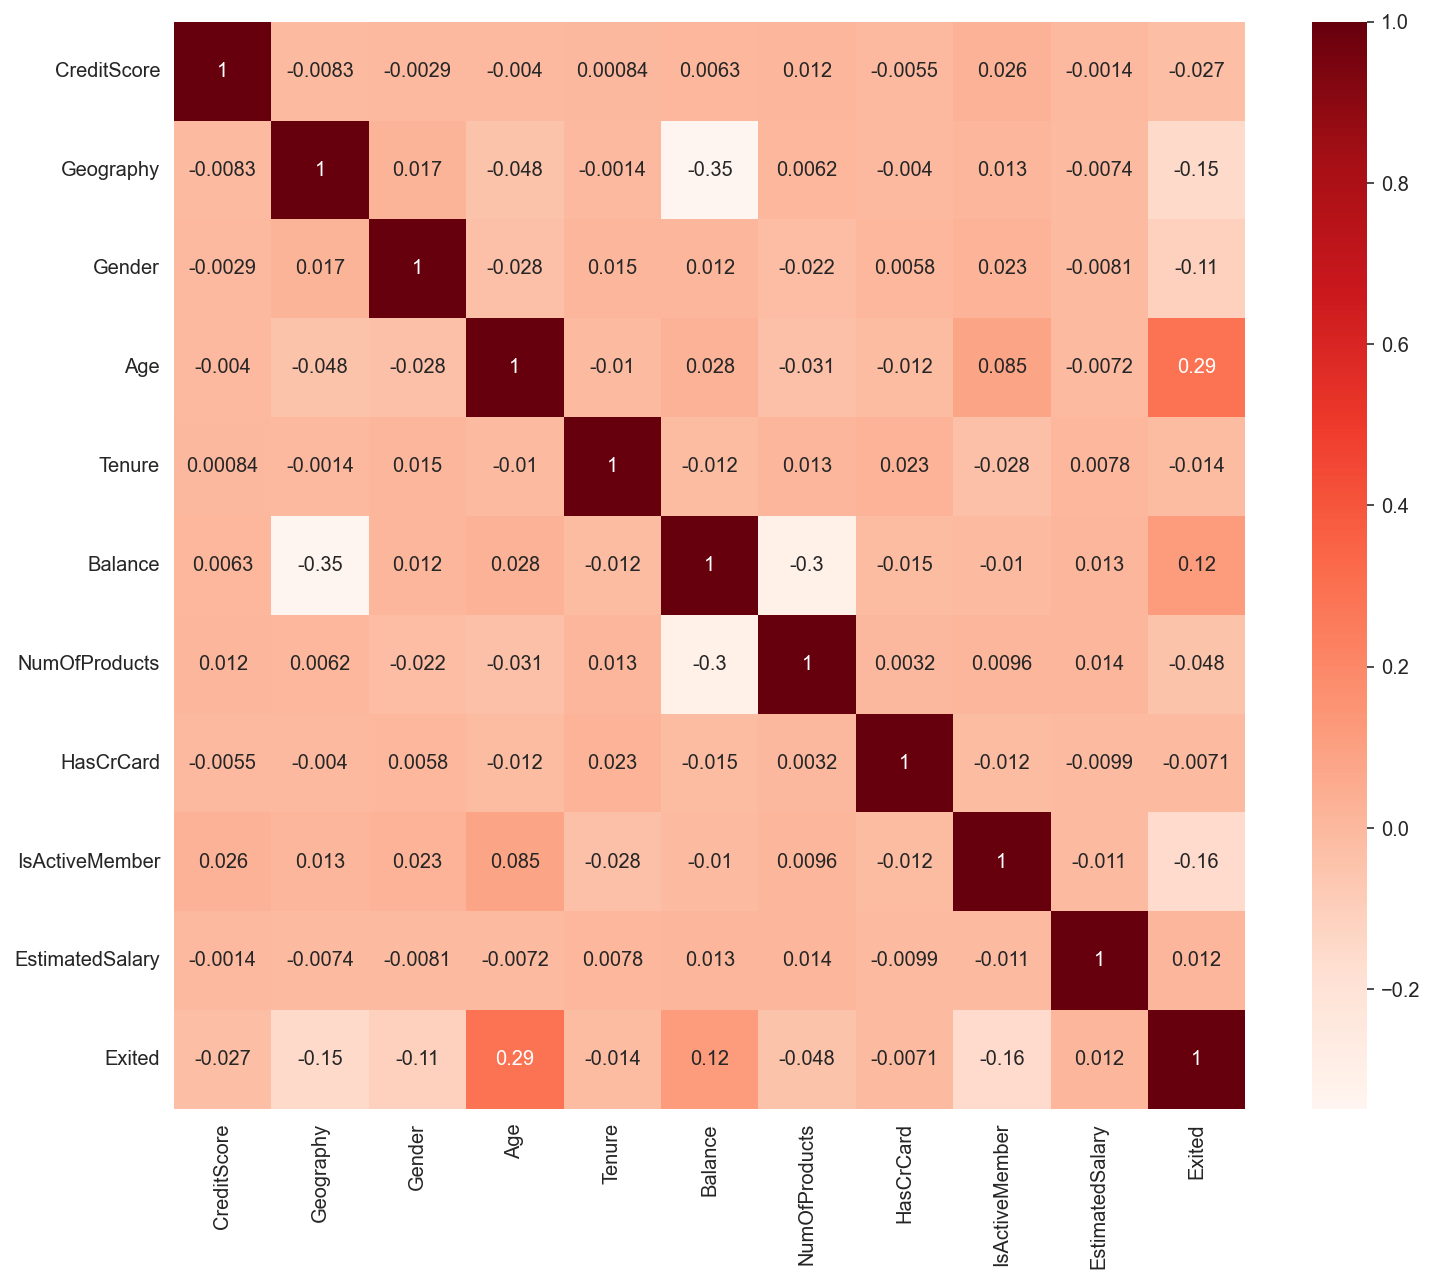

In [73]:
#Feature Selection
#filter based

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [61]:
#Correlation with output variable
#Feature Selection
#filter based
cor_target = abs(cor["Exited"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Geography         0.154
Gender            0.107
Age               0.285
Balance           0.119
IsActiveMember    0.156
Exited            1.000
Name: Exited, dtype: float64

In [ ]:
# pip install pymrmr

In [14]:
# import pymrmr
# pymrmr.mRMR(df, 'MID',6)

In [85]:
#wrapper feature selection
#forward selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np





y = df['Exited']
X = df.drop('Exited', 1)


#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=6,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 5)
#Use SFS to select the top 6 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results



feature_idx                                          cv_scores  \
1                (3,)  [0.08058955522086897, 0.08227376024621502, 0.0...   
2              (3, 8)  [0.13538153836399136, 0.11308643046143596, 0.1...   
3           (1, 3, 8)  [0.14546484226502177, 0.1280060622036422, 0.13...   
4        (1, 2, 3, 8)  [0.15126131453420744, 0.14224830488845808, 0.1...   
5     (1, 2, 3, 5, 8)  [0.15676993786906002, 0.14287816634378248, 0.1...   
6  (0, 1, 2, 3, 5, 8)  [0.15793905064331581, 0.1430726887227125, 0.14...   

  avg_score                                      feature_names  
1     0.081                                             (Age,)  
2     0.113                              (Age, IsActiveMember)  
3     0.131                   (Geography, Age, IsActiveMember)  
4     0.139           (Geography, Gender, Age, IsActiveMember)  
5     0.144  (Geography, Gender, Age, Balance, IsActiveMember)  
6     0.144  (CreditScore, Geography, Gender, Age, Balance,...

In [27]:
#wrapper feature selection
#backward elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np



y = df['Exited']
X = df.drop('Exited', 1)

#Build a logistic regression model 
model = LinearRegression()
#Define RFE 
#rfe = RFE(model,5)
rfe = RFE(estimator=model, n_features_to_select=8)
#Use RFE to select the top 6 features 
rfe.fit(X, y)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': df.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

Feature_names  Selected  RFE_ranking
Columns                                        
0            CreditScore      True            1
1              Geography      True            1
2                 Gender      True            1
3                    Age      True            1
4                 Tenure      True            1
5                Balance      True            1
6          NumOfProducts      True            1
7              HasCrCard     False            3
8         IsActiveMember      True            1
9        EstimatedSalary     False            2

In [67]:
#embedded
#pip install mlxtend
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

y = df['Exited']
X = df.drop('Exited', 1)
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X, y)
print('Selected Features:', list(train_df.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [72]:
#the last test just to compare the result

chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable  Chi-square    p-value
3   NumOfProducts    1503.629  0.000e+00
0       Geography     301.255  3.830e-66
5  IsActiveMember     242.985  8.786e-55
1          Gender     112.919  2.248e-26
2          Tenure      13.900  1.776e-01
4       HasCrCard       0.471  4.924e-01

In [74]:
chi2_array, p_array = [], []
for column in continuous:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': continuous,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='p-value', ascending=True)

Variable  Chi-square     p-value
0              Age    1607.479  3.779e-290
2          Balance    7340.535   2.579e-16
1      CreditScore     510.216   4.915e-02
3  EstimatedSalary   10000.000   4.925e-01

In [ ]:
#the result is compatible with the first test and EDA analysis

In [14]:
#based on the EDA analysis and feature selection results, one suggestion can be remove the 4 below features but I decided to keep them as we didn't have too many features

features_drop = ['HasCrCard', 'EstimatedSalary', 'Tenure']
df = df.drop(features_drop, axis=1)

#print(' Features Dropped!')

In [15]:
#spliting our dataset into a train and test
random_state = 42
train_df, test_df = train_test_split(df, test_size=0.2, random_state=random_state)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 8000 rows x 8 columns
 Test set: 2000 rows x 8 columns


In [16]:
y_train = train_df['Exited']
X_train = train_df.drop('Exited', 1)

print(' Sets Created!')

 Sets Created!


In [17]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [18]:
train_df.describe()

CreditScore  Geography    Gender       Age   Balance  NumOfProducts  \
count     8000.000   8000.000  8000.000  8000.000  8000.000       8000.000   
mean         0.012      2.248     0.545    -0.002    -0.006          1.531   
std          0.997      0.830     0.498     1.003     1.001          0.580   
min         -3.110      1.000     0.000    -1.995    -1.226          1.000   
25%         -0.678      1.000     0.000    -0.660    -1.226          1.000   
50%          0.026      2.000     1.000    -0.183     0.320          1.000   
75%          0.708      3.000     1.000     0.484     0.819          2.000   
max          2.064      3.000     1.000     5.061     2.795          4.000   

       IsActiveMember    Exited  
count        8000.000  8000.000  
mean            0.513     0.205  
std             0.500     0.404  
min             0.000     0.000  
25%             0.000     0.000  
50%             1.000     0.000  
75%             1.000     0.000  
max             1.000     1.000

In [19]:
X_train.head()

CreditScore  Geography  Gender    Age  Balance  NumOfProducts  \
0        0.367          3       1 -0.660   -1.226              2   
1       -0.192          1       1  0.294    0.691              2   
2       -0.947          2       1 -1.423    0.613              1   
3       -0.926          3       0 -1.137    0.948              1   
4       -1.382          3       1  1.628    1.052              1   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               0

In [20]:
#Handling imbalanced data-
#over sampling-SMOTE
over = SMOTE(sampling_strategy='auto', random_state=random_state)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

In [21]:
y_test = test_df['Exited']
X_test = test_df.drop('Exited', 1)

In [22]:
####
# Confusion_matrix and other classification model scores Function
####

def classifi_score(model, model_name, y_test, y_pred):
    
    from sklearn.metrics import confusion_matrix

    confus_mat = confusion_matrix(y_test, y_pred)
    print("Confusion matrix of ", model_name," classifier: ")
    print(confus_mat)
    print("\n")
#     real_positives = sum(y_test==1)
#     real_negatives = sum(y_test==0)
#     print('Real Positives = ', real_positives)
#     print('Real Negatives = ', real_negatives)
#     print('True Positive Rate = ', format(confus_mat[1,1]/real_positives,".2%"))
#     print('True Negative Rate = ', format(confus_mat[0,0]/real_negatives,".2%"))
#     print('False Positive Rate = ', format(confus_mat[0,1]/real_positives,".2%"))
#     print('False Negative Rate = ', format(confus_mat[1,0]/real_negatives,".2%"))
    p = confus_mat[1,1]/(confus_mat[1,1]+confus_mat[0,1])
    print('Precision = ', format(p,".2%"))
    r = confus_mat[1,1]/(confus_mat[1,1]+confus_mat[1,0])
    print('Recall = ', format(r,".2%"))
    print('F1-Score = ', format((2*p*r)/(p+r),".2%"))
    print("\n")

    # classification report
    from sklearn.metrics import classification_report
    print("Classification report of ", model_name," classifier: ")
    print(classification_report(y_test, y_pred))
    print("\n")


Accuracy of  LR  classifier:  0.7195


Confusion matrix of  LR  classifier: 
[[1166  441]
 [ 120  273]]


Precision =  38.24%
Recall =  69.47%
F1-Score =  49.32%


Classification report of  LR  classifier: 
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.38      0.69      0.49       393

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000





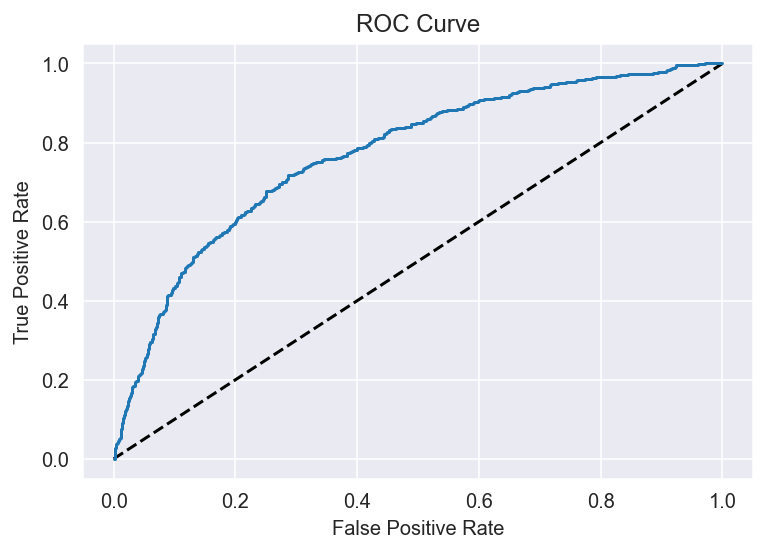

AUC score over the test set: 0.7731568788585562






Accuracy of  KNN  classifier:  0.776


Confusion matrix of  KNN  classifier: 
[[1273  334]
 [ 114  279]]


Precision =  45.51%
Recall =  70.99%
F1-Score =  55.47%


Classification report of  KNN  classifier: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1607
           1       0.46      0.71      0.55       393

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.83      0.78      0.79      2000





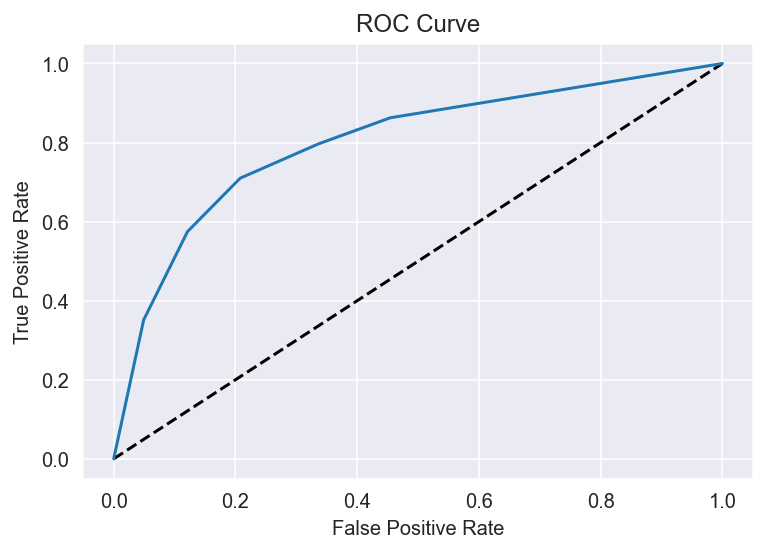

AUC score over the test set: 0.8005030472598411






Accuracy of  DT  classifier:  0.77


Confusion matrix of  DT  classifier: 
[[1318  289]
 [ 171  222]]


Precision =  43.44%
Recall =  56.49%
F1-Score =  49.12%


Classification report of  DT  classifier: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1607
           1       0.43      0.56      0.49       393

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.77      0.78      2000





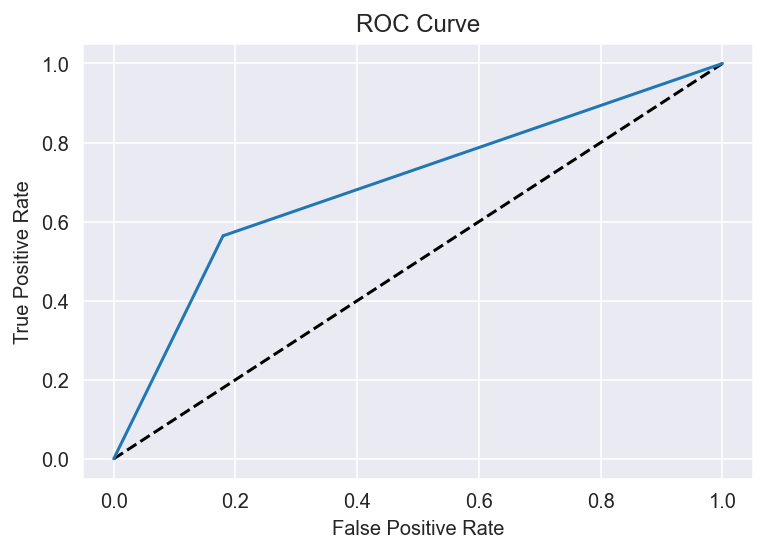

AUC score over the test set: 0.6922528821900369






Accuracy of  RF  classifier:  0.8255


Confusion matrix of  RF  classifier: 
[[1400  207]
 [ 142  251]]


Precision =  54.80%
Recall =  63.87%
F1-Score =  58.99%


Classification report of  RF  classifier: 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.64      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000





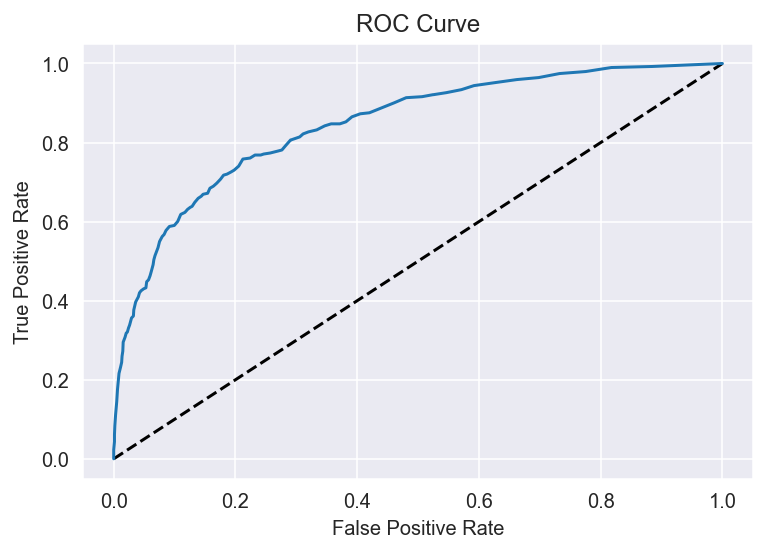

AUC score over the test set: 0.8447726311889302






Accuracy of  SVM  classifier:  0.796


Confusion matrix of  SVM  classifier: 
[[1290  317]
 [  91  302]]


Precision =  48.79%
Recall =  76.84%
F1-Score =  59.68%


Classification report of  SVM  classifier: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.49      0.77      0.60       393

    accuracy                           0.80      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.80      0.81      2000





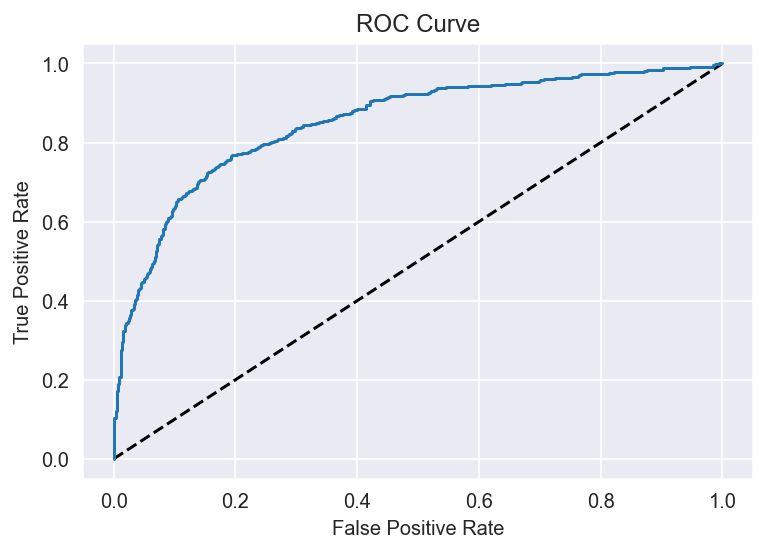

AUC score over the test set: 0.8533562610145499






Accuracy of  GBC  classifier:  0.8205


Confusion matrix of  GBC  classifier: 
[[1348  259]
 [ 100  293]]


Precision =  53.08%
Recall =  74.55%
F1-Score =  62.01%


Classification report of  GBC  classifier: 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.75      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000





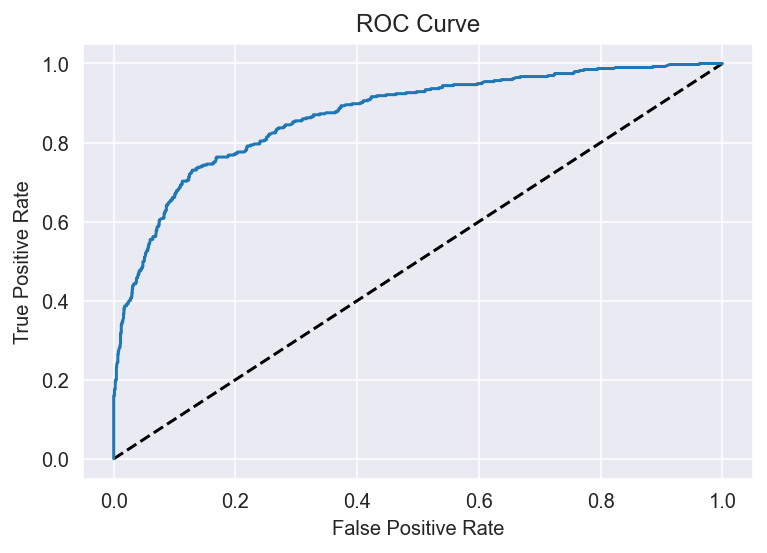

AUC score over the test set: 0.86954260226015






Accuracy of  XGB  classifier:  0.86


Confusion matrix of  XGB  classifier: 
[[1486  121]
 [ 159  234]]


Precision =  65.92%
Recall =  59.54%
F1-Score =  62.57%


Classification report of  XGB  classifier: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.66      0.60      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000





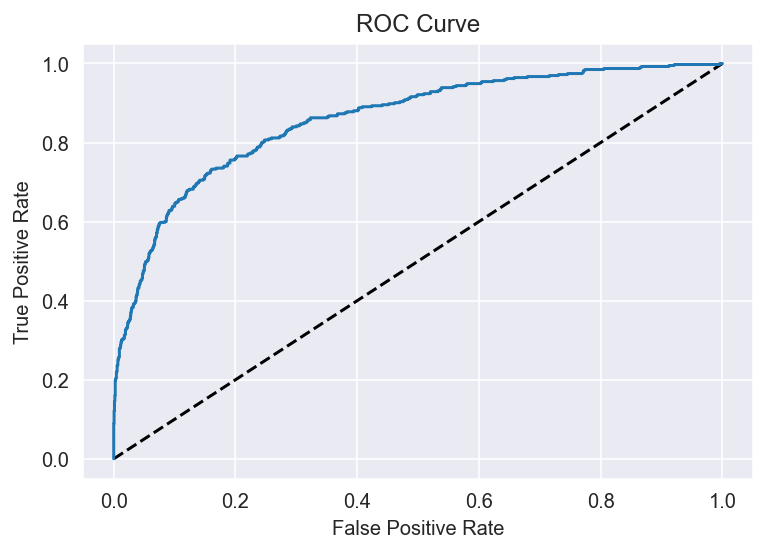

AUC score over the test set: 0.858681246645164






Accuracy of  LightGBM  classifier:  0.8605


Confusion matrix of  LightGBM  classifier: 
[[1470  137]
 [ 142  251]]


Precision =  64.69%
Recall =  63.87%
F1-Score =  64.28%


Classification report of  LightGBM  classifier: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.65      0.64      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.86      0.86      0.86      2000





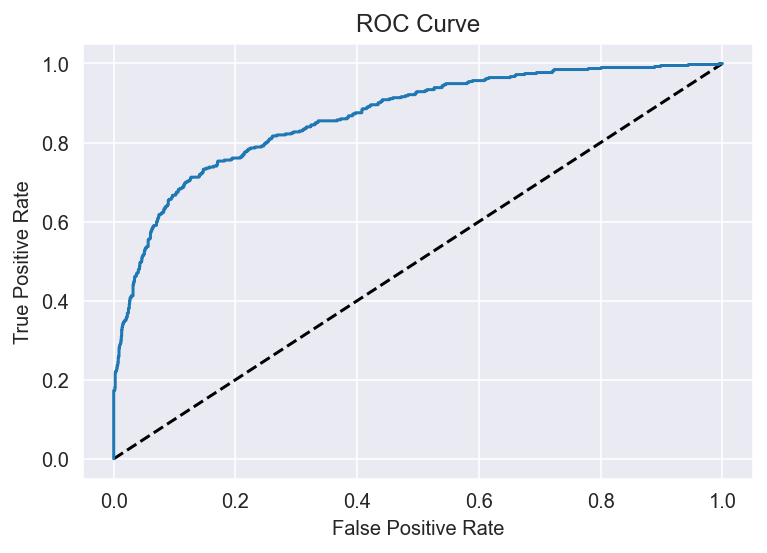

AUC score over the test set: 0.8654748389282894






Accuracy of  CatBoost  classifier:  0.8615


Confusion matrix of  CatBoost  classifier: 
[[1485  122]
 [ 155  238]]


Precision =  66.11%
Recall =  60.56%
F1-Score =  63.21%


Classification report of  CatBoost  classifier: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.66      0.61      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000





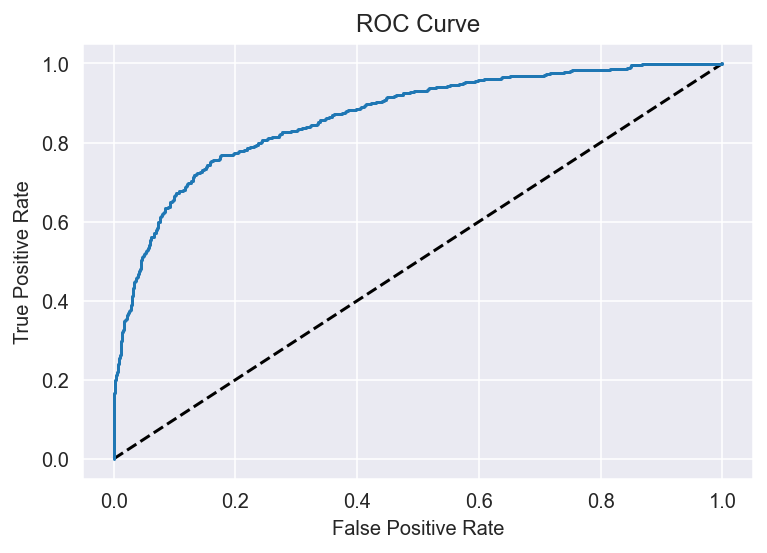

AUC score over the test set: 0.8665159266630882








In [23]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


random_state = 42
classifiers = [LogisticRegression(), KNeighborsClassifier(),
               DecisionTreeClassifier(random_state = random_state),RandomForestClassifier(),SVC(gamma='auto', probability=True),
              GradientBoostingClassifier(random_state = random_state),XGBClassifier(random_state = random_state),
               LGBMClassifier(random_state = random_state),
               CatBoostClassifier(random_state = random_state, verbose = False) ]


classifier_name = ['LR','KNN', 'DT', 'RF', 'SVM', 'GBC', 'XGB', 'LightGBM', 'CatBoost']


for i in range(len(classifiers)):
    classifiers[i].fit(X_train, y_train)

    print("Accuracy of ",classifier_name[i]," classifier: ", classifiers[i].score(X_test, y_test))
    print("\n")
    y_pred = classifiers[i].predict(X_test)
    classifi_score(classifiers[i], classifier_name[i], y_test, y_pred)

    
    # Receiver Operating Characteristic (ROC) Curve
    from sklearn.metrics import roc_curve
    y_pred_prob = classifiers[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='logistic regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();


    # Area Under Curve (AUC) score
    from sklearn.metrics import roc_auc_score
    print('AUC score over the test set:', roc_auc_score(y_test, y_pred_prob))
    print("\n")
    print("\n")
    print("\n")
    
    
#our focus is on Recall score as minimizng the false negatives is critical here in this model.
# false negatives are the customers who are likely to be churned but they are not listed among predicted churned customers)


In [35]:
#sorted(sklearn.metrics.SCORERS.keys())

In [29]:
#Evaluate Stability

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(("CatBoost", CatBoostClassifier(verbose = False)))

# evaluate each model in turn
results = []
names = []

scoring_metric = 'accuracy'
#Evaluate Stability

cv_base_mean, cv_std = [], []
for classifier in models:

    cv = cross_val_score(estimator=classifier[1],
                         X=X_train,
                         y=y_train,
                         scoring=scoring_metric,
                         cv=10,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (accuracy):')

for i in range(len(models)):
    print('   {}: score {} , std {}'.format(models[i][0], np.round(cv_base_mean[i], 2),np.round(cv_std[i], 2)))


Baseline Models (accuracy):
   LR: score 0.73 , std 0.03
   KNN: score 0.86 , std 0.02
   DT: score 0.83 , std 0.04
   RF: score 0.9 , std 0.03
   SVM: score 0.82 , std 0.02
   GBC: score 0.86 , std 0.04
   XGB: score 0.9 , std 0.08
   LightGBM: score 0.9 , std 0.08
   CatBoost: score 0.9 , std 0.08


In [30]:
#Evaluate Stability

# evaluate each model in turn
results = []
names = []

scoring_metric = 'f1'
#Evaluate Stability

cv_base_mean, cv_std = [], []
for classifier in models:

    cv = cross_val_score(estimator=classifier[1],
                         X=X_train,
                         y=y_train,
                         scoring=scoring_metric,
                         cv=10,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (f1):')

for i in range(len(models)):
    print('   {}: score {} , std {}'.format(models[i][0], np.round(cv_base_mean[i], 2),np.round(cv_std[i], 2)))


Baseline Models (f1):
   LR: score 0.73 , std 0.03
   KNN: score 0.87 , std 0.02
   DT: score 0.83 , std 0.05
   RF: score 0.9 , std 0.04
   SVM: score 0.82 , std 0.02
   GBC: score 0.85 , std 0.05
   XGB: score 0.88 , std 0.11
   LightGBM: score 0.89 , std 0.1
   CatBoost: score 0.89 , std 0.1


In [34]:
#Evaluate Stability
# evaluate each model in turn
results = []
names = []

scoring_metric = 'roc_auc'
#Evaluate Stability

cv_base_mean, cv_std = [], []
for classifier in models:

    cv = cross_val_score(estimator=classifier[1],
                         X=X_train,
                         y=y_train,
                         scoring=scoring_metric,
                         cv=10,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (roc_auc):')

for i in range(len(models)):
    print('   {}: score {} , std {}'.format(models[i][0], np.round(cv_base_mean[i], 2),np.round(cv_std[i], 2)))


Baseline Models (roc_auc):
   LR: score 0.8 , std 0.03
   KNN: score 0.93 , std 0.02
   DT: score 0.83 , std 0.04
   RF: score 0.96 , std 0.02
   SVM: score 0.9 , std 0.02
   GBC: score 0.93 , std 0.04
   XGB: score 0.96 , std 0.05
   LightGBM: score 0.96 , std 0.04
   CatBoost: score 0.96 , std 0.04


In [33]:
#Evaluate Stability

# evaluate each model in turn
results = []
names = []

scoring_metric = 'recall'
#Evaluate Stability

cv_base_mean, cv_std = [], []
for classifier in models:

    cv = cross_val_score(estimator=classifier[1],
                         X=X_train,
                         y=y_train,
                         scoring=scoring_metric,
                         cv=10,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (recall):')

for i in range(len(models)):
    print('   {}: score {} , std {}'.format(models[i][0], np.round(cv_base_mean[i], 2),np.round(cv_std[i], 2)))


Baseline Models (recall):
   LR: score 0.72 , std 0.05
   KNN: score 0.94 , std 0.03
   DT: score 0.84 , std 0.09
   RF: score 0.91 , std 0.06
   SVM: score 0.81 , std 0.04
   GBC: score 0.85 , std 0.09
   XGB: score 0.87 , std 0.19
   LightGBM: score 0.87 , std 0.17
   CatBoost: score 0.87 , std 0.17


In [31]:
#Evaluate Efficiency
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
random_state = 42

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression(random_state = random_state)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = random_state)))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models.append(('GBC', GradientBoostingClassifier(random_state = random_state)))
models.append(('XGB', XGBClassifier(random_state = random_state)))
models.append(("LightGBM", LGBMClassifier(random_state = random_state)))
models.append(("CatBoost", CatBoostClassifier(random_state = random_state, verbose = False)))

results = []
names = []


In [32]:
#Evaluate Efficiency
#X=X_train
for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, f1)
        print(msg)
        end = time.time()
        print('Time', (end - start))

LR: (0.486537)
Time 0.04487943649291992
KNN: (0.521308)
Time 0.29620838165283203
DT: (0.473214)
Time 0.0768277645111084
RF: (0.604192)
Time 1.788184642791748
SVM: (0.583751)
Time 5.287861108779907
GBC: (0.628763)
Time 1.6934716701507568
XGB: (0.591160)
Time 1.0292460918426514
LightGBM: (0.626703)
Time 0.17852282524108887
CatBoost: (0.611187)
Time 7.462937116622925


In [52]:
#Evaluate Efficiency
#X=X_train
for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        print(msg)
        end = time.time()
        print('Time', (end - start))

LR: (0.666667)
Time 0.03690052032470703
KNN: (0.669211)
Time 0.2263956069946289
DT: (0.539440)
Time 0.06877851486206055
RF: (0.623410)
Time 1.5598669052124023
SVM: (0.740458)
Time 5.387824058532715
GBC: (0.717557)
Time 1.7682886123657227
XGB: (0.544529)
Time 1.02720046043396
LightGBM: (0.585242)
Time 0.19447922706604004
CatBoost: (0.569975)
Time 7.252615451812744


In [24]:
#feature imporance charts

rs = 42
models2 = []
models2.append(('DT', DecisionTreeClassifier( random_state = rs)))
models2.append(('RF', RandomForestClassifier( random_state = rs)))
# models2.append(('SVM', SVC( random_state = rs)))
models2.append(('GBC', GradientBoostingClassifier( random_state = rs)))
models2.append(('XGB', XGBClassifier( random_state = rs)))
models2.append(("LightGBM", LGBMClassifier( random_state = rs)))
models2.append(("CatBoost", CatBoostClassifier(random_state = rs, verbose = False)))

model Coefficients: [('Age', 0.37443381807690945), ('CreditScore', 0.20260845148088466), ('Balance', 0.17459726665935177), ('NumOfProducts', 0.1252119164822996), ('IsActiveMember', 0.05009905433618427), ('Geography', 0.04639614077720741), ('Gender', 0.02665335218716298)]


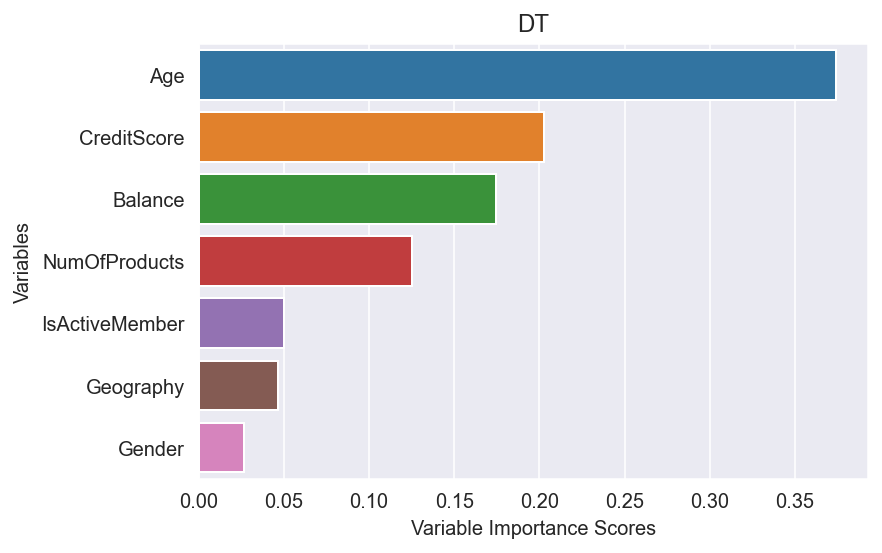

model Coefficients: [('Age', 0.3421352989389681), ('CreditScore', 0.21023651534930482), ('Balance', 0.19262918674644344), ('NumOfProducts', 0.13846212300323857), ('Geography', 0.049673528824712695), ('IsActiveMember', 0.04287676286975985), ('Gender', 0.023986584267572417)]


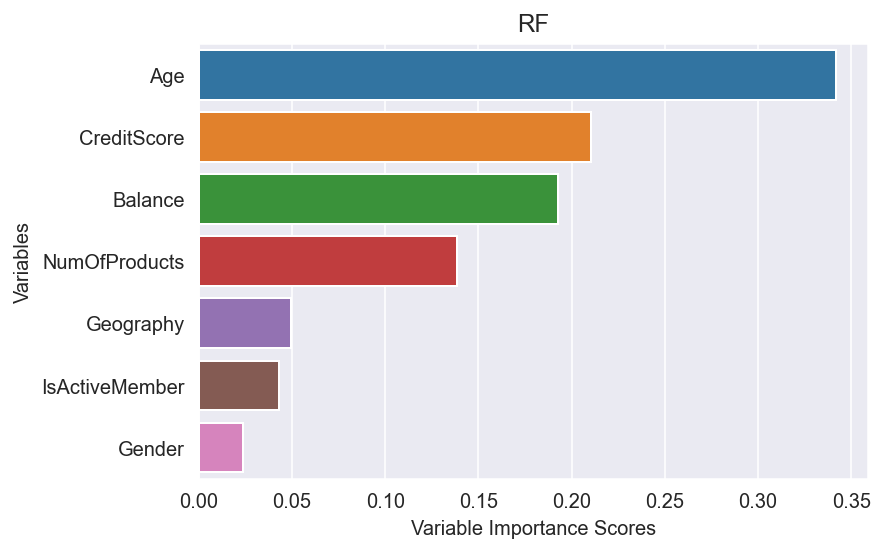

model Coefficients: [('Age', 0.519147825525707), ('NumOfProducts', 0.24484293713067057), ('IsActiveMember', 0.07529731414699131), ('Balance', 0.07166903408114118), ('Geography', 0.05753280021899225), ('Gender', 0.023353729887070875), ('CreditScore', 0.008156359009426777)]


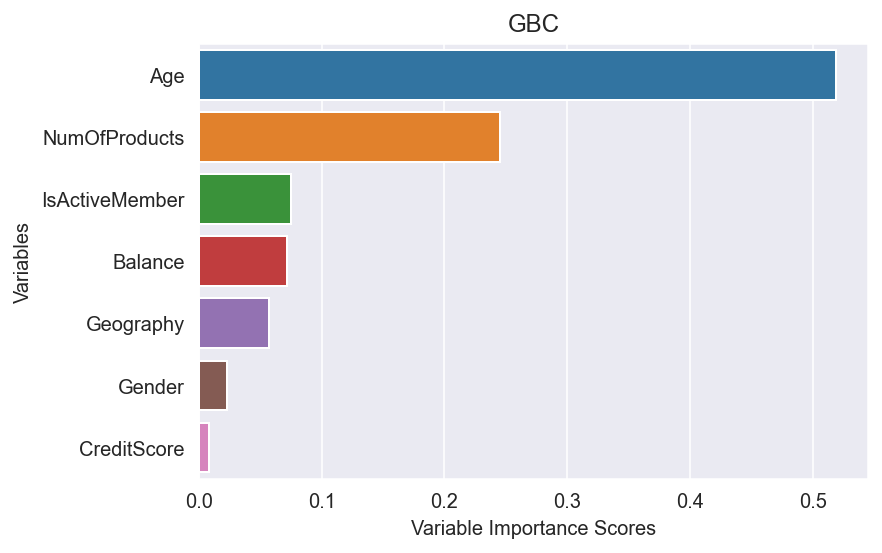

model Coefficients: [('NumOfProducts', 0.3499676), ('IsActiveMember', 0.2059714), ('Age', 0.19678941), ('Geography', 0.081762165), ('Gender', 0.073562264), ('Balance', 0.06068159), ('CreditScore', 0.031265665)]


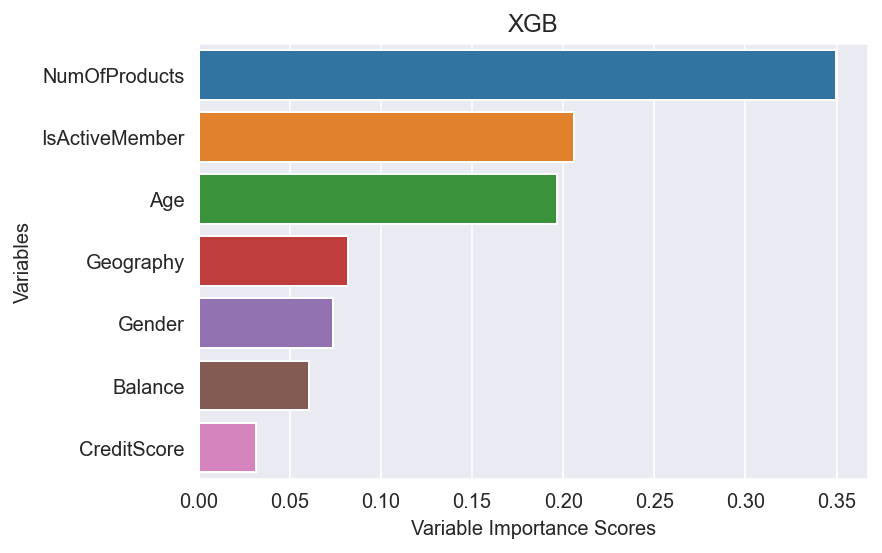

model Coefficients: [('Age', 1424), ('CreditScore', 531), ('Balance', 509), ('NumOfProducts', 206), ('Geography', 150), ('IsActiveMember', 102), ('Gender', 78)]


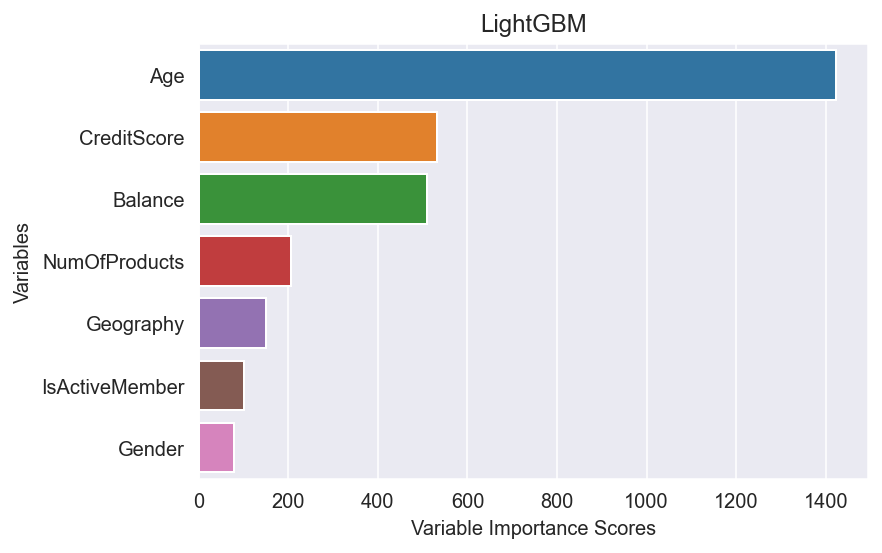

model Coefficients: [('Age', 64.42323227643645), ('NumOfProducts', 13.3501118399526), ('Balance', 6.981514086982471), ('CreditScore', 4.4835824189807125), ('IsActiveMember', 4.3857728119505595), ('Geography', 4.373668463310587), ('Gender', 2.002118102386612)]


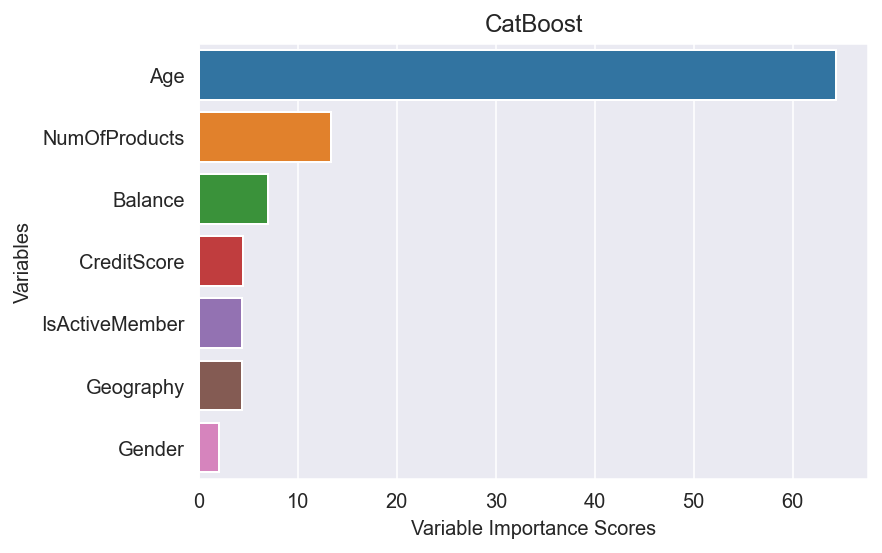

In [25]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
#         acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
        print('model Coefficients: {}'.format(sorted(dict(list(zip(X_train.columns,base.feature_importances_))).items(), key=lambda x: x[1], reverse=True)))
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Variable Importance Scores')
        plt.ylabel('Variables')
        plt.title(name)
        plt.show()

In [ ]:
#MODEL TUNING

In [78]:
#     #MODEL TUNING for RF
#     #Obtaining the Optimal Hyperparameters
#     from sklearn.model_selection import GridSearchCV
#     from sklearn.ensemble import GradientBoostingClassifier
#     RF = RandomForestClassifier()

#     parameters = [{'kernel': ['rbf'],
#                    'gamma': ['scale', 'auto'],
#                    'C': [.1, 1, 2]},
#                    {'kernel': ['linear'],
#                     'C': [.1, 1, 10]}
#                                 ]
#     grid_GBC = GridSearchCV(estimator=RF, param_grid = parameters, cv = 5, n_jobs=-1)
#     grid_GBC.fit(X_train, y_train)
#     print(" Results from Grid Search " )
#     print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
#     print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
#     print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

In [79]:
# RandomForestClassifier.get_params(()).keys()

In [62]:
    #MODEL TUNING for XGB
    #Obtaining the Optimal Hyperparameters 

    XGB = XGBClassifier()
    scoring_metric = 'recall'
    parameters = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.001, 0.01, 0.1],
                  'max_depth': [3, 4, 6],
                  'subsample': [0.5, 0.75],
                  'gamma': [0.1, 0.5, 1],
                 }
    grid_XGB = GridSearchCV(estimator=XGB, param_grid = parameters,scoring= scoring_metric, cv = 5, n_jobs=-1)
    grid_XGB.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 The best score across ALL searched params:
 0.8635940105597039

 The best parameters across ALL searched params:
 {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.5}


In [ ]:
#based on the below result XGB model tuning improved the recall score for about 3%

Accuracy of grid_XGB.best_estimator_ classifier:  0.852


Confusion matrix of  grid_XGB.best_estimator__classifier  classifier: 
[[1479  128]
 [ 168  225]]


Precision =  63.74%
Recall =  57.25%
F1-Score =  60.32%


Classification report of  grid_XGB.best_estimator__classifier  classifier: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.57      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000





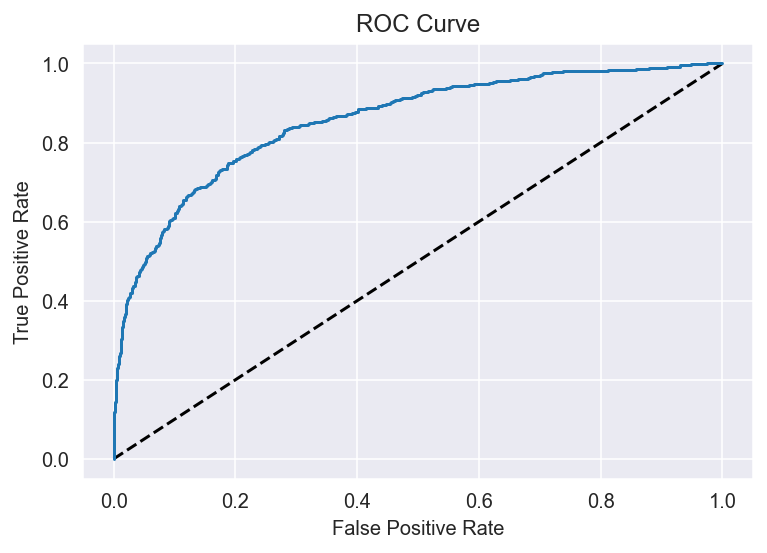

AUC score over the test set: 0.8570170896728848








In [63]:
print("Accuracy of grid_XGB.best_estimator_ classifier: ", grid_XGB.best_estimator_.score(X_test, y_test))
print("\n")
y_pred = grid_XGB.best_estimator_.predict(X_test)
classifi_score(grid_XGB.best_estimator_, 'grid_XGB.best_estimator__classifier', y_test, y_pred)


# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve
y_pred_prob = grid_XGB.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='grid_XGB.best_estimator__classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();


# Area Under Curve (AUC) score
from sklearn.metrics import roc_auc_score
print('AUC score over the test set:', roc_auc_score(y_test, y_pred_prob))
print("\n")
print("\n")
print("\n")

In [34]:
#MODEL TUNING for GBC
#Obtaining the Optimal Hyperparameters for the highest score models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.2],
              'subsample'    : [0.618, 0.65, 0.75, 0.85, 0.95],
              'n_estimators' : [200,350,400, 450],
              'max_depth'    : [5,8,10, 14]
             }
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)
    

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.05, max_depth=14, n_estimators=350,
                           subsample=0.85)

 The best score across ALL searched params:
 0.8864065449968533

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'max_depth': 14, 'n_estimators': 350, 'subsample': 0.85}


Accuracy of grid_GBC.best_estimator_ classifier:  0.856


Confusion matrix of  grid_GBC.best_estimator__classifier  classifier: 
[[1496  111]
 [ 177  216]]


Precision =  66.06%
Recall =  54.96%
F1-Score =  60.00%


Classification report of  grid_GBC.best_estimator__classifier  classifier: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000





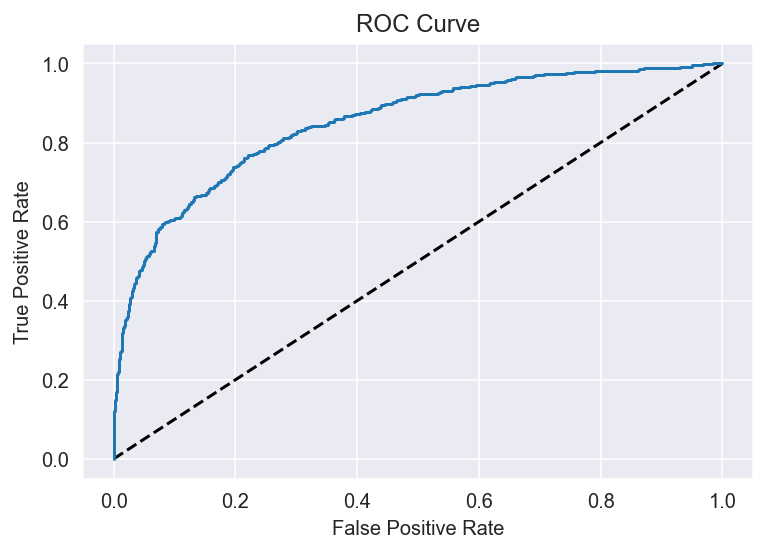

AUC score over the test set: 0.8512756689483509








In [36]:
print("Accuracy of grid_GBC.best_estimator_ classifier: ", grid_GBC.best_estimator_.score(X_test, y_test))
print("\n")
y_pred = grid_GBC.best_estimator_.predict(X_test)
classifi_score(grid_GBC.best_estimator_, 'grid_GBC.best_estimator__classifier', y_test, y_pred)


# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve
y_pred_prob = grid_GBC.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='grid_GBC.best_estimator__classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();


# Area Under Curve (AUC) score
from sklearn.metrics import roc_auc_score
print('AUC score over the test set:', roc_auc_score(y_test, y_pred_prob))
print("\n")
print("\n")
print("\n")

In [ ]:
#it couldn't be tunned only based on one specific metric

# #MODEL TUNING for GBC
# #Obtaining the Optimal Hyperparameters for the highest score models

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import make_scorer
# GBC = GradientBoostingClassifier()
# scoring_metric = 'recall'

# parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.2],
#               'subsample'    : [0.65, 0.75, 0.85, 0.95],
#               'n_estimators' : [200,300,350],
#               'max_depth'    : [3,4,5,8,10]
#              }
# grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters,scoring=scoring_metric,refit=False, cv = 5, n_jobs=-1)
# grid_GBC.fit(X_train, y_train)
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)
    


In [116]:
    #MODEL TUNING for LightGBM
    #Obtaining the Optimal Hyperparameters 
    
    LightGBM = LGBMClassifier()

    parameters = {'max_depth'    : [3,5,7],
                  'num_leaves': [5, 10],
                  'learning_rate': [0.001, 0.01, 0.1],
                  'subsample'    : [0.9,0.8,0.7,0.6],
                  'n_estimators' : [100,200,500],
                  'reg_alpha': [0.1, 0.5],
                  'reg_lambda': [0.1, 0.5]
                 }
    grid_LightGBM = GridSearchCV(estimator=LightGBM, param_grid = parameters, cv = 5, n_jobs=-1)
    grid_LightGBM.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_LightGBM.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_LightGBM.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_LightGBM.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMClassifier(max_depth=7, n_estimators=500, num_leaves=10, reg_alpha=0.5,
               reg_lambda=0.5, subsample=0.9)

 The best score across ALL searched params:
 0.8839803994427244

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 10, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.9}


In [39]:
#Hyperparameters have previously been obtained with the help of GridSearchCV.

models = []
models.append(('GBC', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.05, max_depth = 10, n_estimators = 350, subsample = 0.65)))
models.append(('XGB', XGBClassifier(random_state = 12345,learning_rate = 0.1, max_depth = 6, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.1, max_depth = 7, n_estimators = 500 , num_leaves =10, reg_alpha= 0.5, reg_lambda = 0.5, subsample= 0.9  )))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))


# evaluate each model in turn
results = []
names = []

for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        end = time.time()
        print(end - start)
        print(msg)


16.48192548751831
GBC: (0.559796)
[20:43:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


5.130279302597046
XGB: (0.554707)
0.4330410957336426
LightGBM: (0.587786)
26.597675323486328
CatBoost: (0.631043)
